In [1]:
import matplotlib.pyplot as plt 
import sys 
sys.path.insert(0, '/home/ndurasov/cloned_ig_cluster_splitter/ig_cluster_splitter/scripts')
import func_tools
reload(func_tools)
from collections import Counter
import numpy as np
import pandas as pd 
from collections import defaultdict
import pickle 
import json 
import os 
import re 

/home/ndurasov/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [48]:
def sens_prec_plot(igrec_json, test_json, axe):
    axe.plot(test_json['reference_based']['__data_precision'], test_json['reference_based']['__data_sensitivity'], label='Stacking model', c='r')
    axe.plot(igrec_json['reference_based']['__data_precision'], igrec_json['reference_based']['__data_sensitivity'], label='IgReC output', c='b')
    axe.scatter(test_json['reference_based']['__data_precision'], test_json['reference_based']['__data_sensitivity'], s=5, c='r')
    axe.scatter(igrec_json['reference_based']['__data_precision'], igrec_json['reference_based']['__data_sensitivity'], s=5, c='b')
    axe.scatter(test_json['reference_based']['__data_precision'][4], 
                test_json['reference_based']['__data_sensitivity'][4], s=20, c='k')
    axe.scatter(igrec_json['reference_based']['__data_precision'][4], 
                igrec_json['reference_based']['__data_sensitivity'][4], s=20, c='k')
    

def res_cons(input_reads, ref_rcm_file, cons_rcm_file):
    id_dict = func_tools.id_to_read(input_reads)
    ref_rcm = func_tools.read_rcm(ref_rcm_file)
    cons_rcm = func_tools.read_rcm(cons_rcm_file)
    ref_clusters = func_tools.construct_clusters(ref_rcm, id_dict)
    cons_clusters = func_tools.construct_clusters(cons_rcm, id_dict)
    rep = func_tools.clusters2rep(ref_clusters)
    cons_rep = func_tools.clusters2rep(cons_clusters)
    res = func_tools.find_unrecognized_clusters(rep, cons_rep)
    return (res, ref_clusters, cons_clusters)

def calc_paired_sizes_hist(input_reads, ref_rcm_file, cons_rcm_file_igrec, cons_rcm_file_splitted):
   
    res = res_cons(input_reads, ref_rcm_file, cons_rcm_file_igrec)
    res1 = res_cons(input_reads, ref_rcm_file, cons_rcm_file_splitted)

    r = set(res[0])
    ref_clusters = res[1]
    cons_clusters = res[2]

    missed_clusters = {cluster:ref_clusters[cluster] for cluster in r}

    missed_sizes = func_tools.clusters_size_dict(missed_clusters)

    all_sizes = func_tools.clusters_size_dict(ref_clusters)

    missed_freq = defaultdict(lambda : 0, Counter(missed_sizes.values()))

    all_freq = defaultdict(lambda : 0, Counter(all_sizes.values()))

    a = []
    for i in range(5, 200):
        if all_freq[i]:
            a.append(1.0 * missed_freq[i] / all_freq[i])
        else:
            a.append(0)

    r1 = set(res1[0])
    ref_clusters1 = res1[1]
    cons_clusters1 = res1[2]

    missed_clusters = {cluster:ref_clusters1[cluster] for cluster in r1}

    missed_sizes = func_tools.clusters_size_dict(missed_clusters)

    all_sizes = func_tools.clusters_size_dict(ref_clusters1)

    missed_freq = defaultdict(lambda : 0, Counter(missed_sizes.values()))

    all_freq = defaultdict(lambda : 0, Counter(all_sizes.values()))

    b = []
    for i in range(5, 200):
        if all_freq[i]:
            b.append(1.0 * missed_freq[i] / all_freq[i])
        else:
            b.append(0)
    return [a,b]

In [15]:
igrec_rcm = ft.read_rcm('data/final_repertoire.rcm')
id_dict = ft.id_to_read('data/input3.fa')
reference_rcm = ft.read_rcm('data/repertoire3.rcm')
reference = ft.read_repertoire('data/repertoire3.fa')

clusters = ft.construct_clusters(igrec_rcm, id_dict)

In [16]:
ans = ft.reference_classification(clusters, reference_rcm, reference, id_dict)

In [22]:
res = []
for perc in ans[1].values():
    res.append(perc)

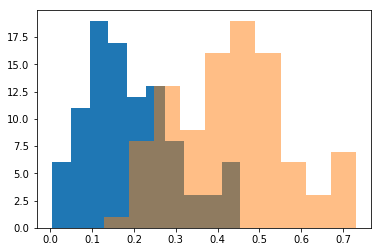

In [33]:
plt.hist(np.array(res)[:,1])
plt.hist(np.array(res)[:,0], alpha=0.5)
plt.show()

In [45]:
ans2 = ft.simple_clusters_classification(clusters, reference)

0  reads checked
1000  reads checked
2000  reads checked
3000  reads checked
4000  reads checked
5000  reads checked
6000  reads checked
7000  reads checked
8000  reads checked
9000  reads checked
10000  reads checked
11000  reads checked
12000  reads checked
13000  reads checked
14000  reads checked
15000  reads checked
16000  reads checked
17000  reads checked
18000  reads checked
19000  reads checked
20000  reads checked
21000  reads checked
22000  reads checked
23000  reads checked
24000  reads checked
25000  reads checked
26000  reads checked
27000  reads checked
28000  reads checked


In [44]:
reload(ft)

<module 'func_tools' from 'func_tools.py'>

In [53]:
len(set(ans2.keys()).intersection(set(dict(filter(lambda x: x[1] == 1, ans[0].items())).keys())))

98

In [6]:
f = plt.figure()


In [10]:
f.savefig?

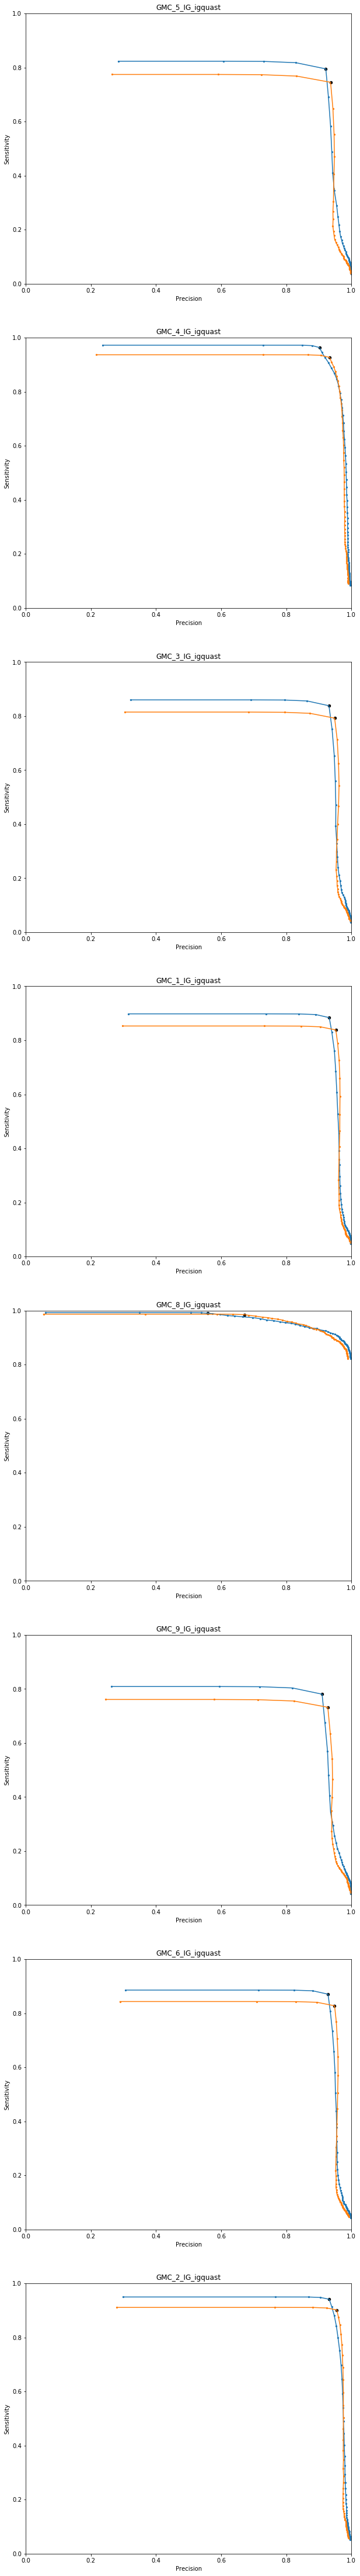

In [11]:
base = '/Bmo/orange_nikita/GMC_compilation/splitted/'
regex = re.compile('.*_igquast+$')
dirs = filter(regex.match, os.listdir('/Bmo/orange_nikita/GMC_compilation/splitted/'))
fig = plt.figure()
fig, axes = plt.subplots(nrows=len(dirs), ncols=1, figsize=(10,80))

for i, dataset in enumerate(dirs):
    igrec_json = json.load(open(base + dataset +'/igrec_origin/igquast.json', 'r'))
    test_json = json.load(open(base + dataset + '/igrec_splitted/igquast.json', 'r'))
    sens_prec_plot(igrec_json, test_json, axes[i])
    axes[i].set_xlabel('Precision')
    axes[i].set_ylabel('Sensitivity')
    axes[i].set_title(dataset)
    axes[i].set_xlim((0,1))
    axes[i].set_ylim((0,1))
plt.show()

fig.savefig('GMC.pdf', format='pdf')

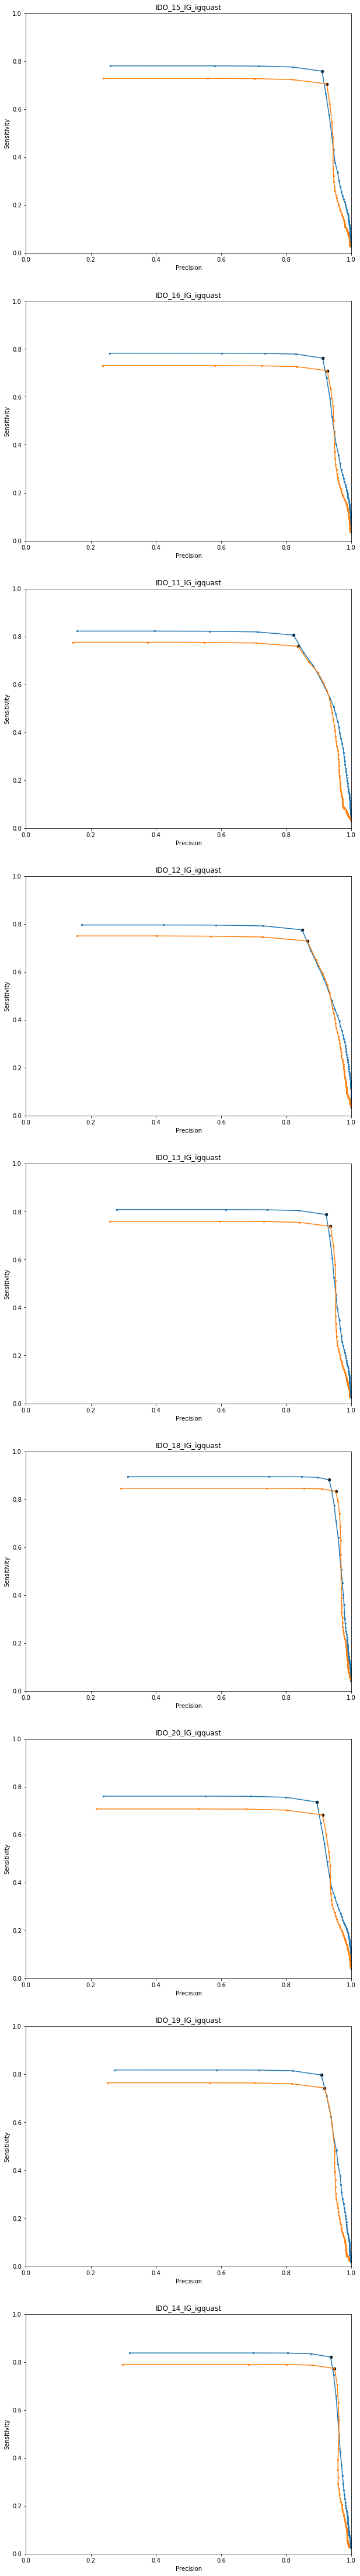

In [12]:
base = '/Bmo/orange_nikita/IDO_compilation/splitted/'
regex = re.compile('.*_igquast+$')
dirs = filter(regex.match, os.listdir(base))
fig = plt.figure()
fig, axes = plt.subplots(nrows=len(dirs), ncols=1, figsize=(10,80))

for i, dataset in enumerate(dirs):
    igrec_json = json.load(open(base + dataset +'/igrec_origin/igquast.json', 'r'))
    test_json = json.load(open(base + dataset + '/igrec_splitted/igquast.json', 'r'))
    sens_prec_plot(igrec_json, test_json, axes[i])
    axes[i].set_xlabel('Precision')
    axes[i].set_ylabel('Sensitivity')
    axes[i].set_title(dataset)
    axes[i].set_xlim((0,1))
    axes[i].set_ylim((0,1))
plt.show()

fig.savefig('IDO.pdf', format='pdf')

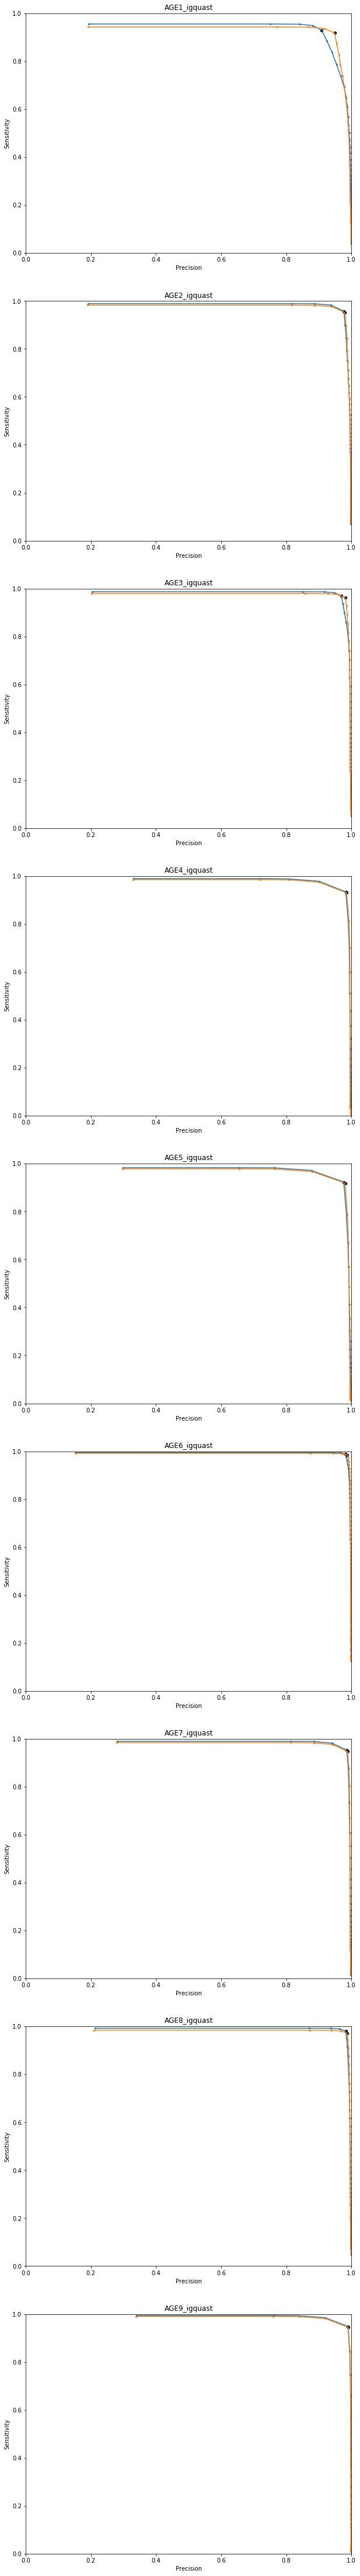

In [13]:
base = '/Bmo/orange_nikita/AGE_compilation/splitted/'
regex = re.compile('.*_igquast+$')
dirs = filter(regex.match, os.listdir(base))
fig = plt.figure()
fig, axes = plt.subplots(nrows=len(dirs), ncols=1, figsize=(10,80))

for i, dataset in enumerate(dirs):
    igrec_json = json.load(open(base + dataset +'/igrec_origin/igquast.json', 'r'))
    test_json = json.load(open(base + dataset + '/igrec_splitted/igquast.json', 'r'))
    sens_prec_plot(igrec_json, test_json, axes[i])
    axes[i].set_xlabel('Precision')
    axes[i].set_ylabel('Sensitivity')
    axes[i].set_title(dataset)
    axes[i].set_xlim((0,1))
    axes[i].set_ylim((0,1))
plt.show()

fig.savefig('AGE.pdf', format='pdf')

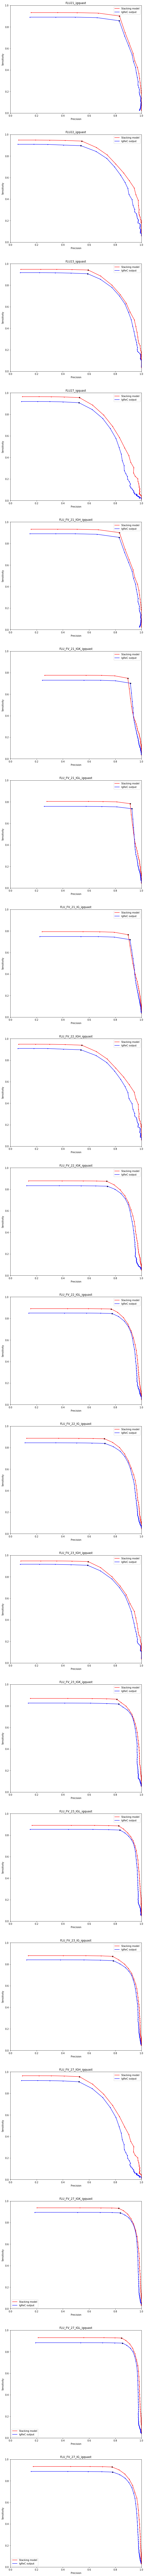

In [18]:
base = '/Bmo/orange_nikita/FLU_compilation/splitted/'
regex = re.compile('.*_igquast+$')
dirs = filter(regex.match, os.listdir(base))
fig = plt.figure()
fig, axes = plt.subplots(nrows=len(dirs), ncols=1, figsize=(10,200))

for i, dataset in enumerate(dirs):
    igrec_json = json.load(open(base + dataset +'/igrec_origin/igquast.json', 'r'))
    test_json = json.load(open(base + dataset + '/igrec_splitted/igquast.json', 'r'))
    sens_prec_plot(igrec_json, test_json, axes[i])
    axes[i].set_xlabel('Precision')
    axes[i].set_ylabel('Sensitivity')
    axes[i].set_title(dataset)
    axes[i].set_xlim((0,1))
    axes[i].set_ylim((0,1))
    axes[i].legend()
plt.show()

#fig.savefig('FLU.pdf', format='pdf')

In [5]:
df = pd.read_csv('/Bmo/orange_nikita/AGE_compilation/AGE1_dataset_2.csv')

In [15]:
df = df[df['size'] > 10]

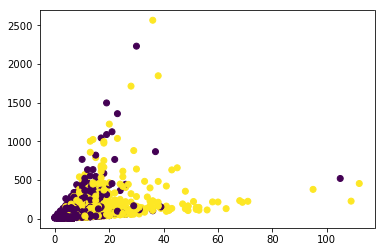

In [21]:
plt.scatter(df['value1'] * df['size'], df['size'], c=df['quality_imp'])
plt.show()

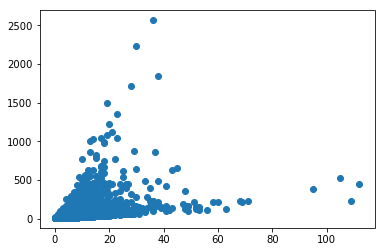

In [5]:
input_reads = '/Bmo/orange_nikita/GMC_compilation/GMC_3_IG/input3.fa'
ref_rcm_file = '/Bmo/orange_nikita/GMC_compilation/GMC_3_IG/repertoire3.rcm'
cons_rcm_file = '/Bmo/orange_nikita/GMC_compilation/GMC_3_IG/final_repertoire.rcm'
res = res_cons(input_reads, ref_rcm_file, cons_rcm_file)

In [9]:
r = set(res[0])
ref_clusters = res[1]
cons_clusters = res[2]

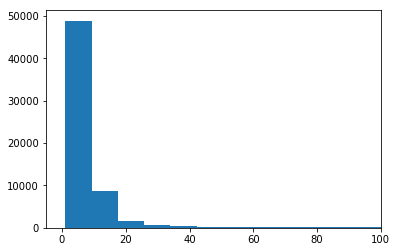

In [183]:
plt.hist(func_tools.clusters_size_dict(ref_clusters).values(), bins=300)
plt.xlim((-5, 100))
plt.show()

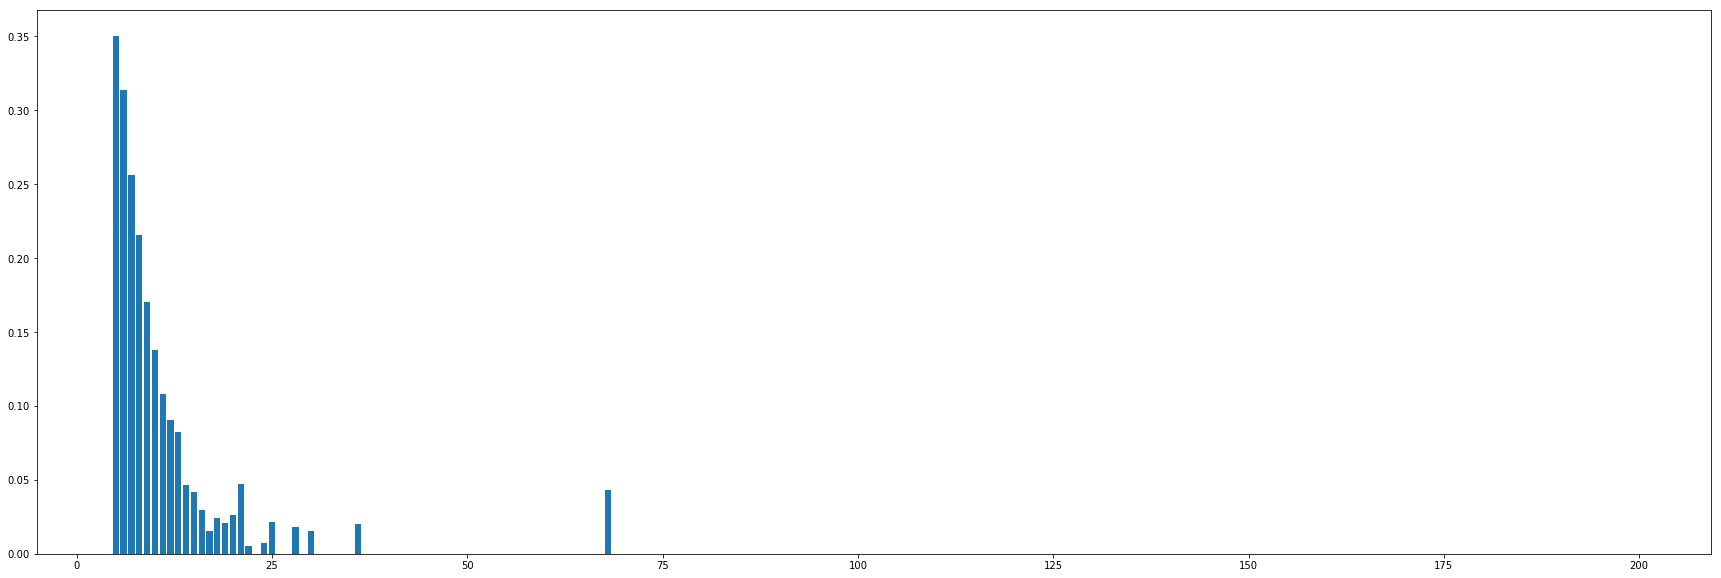

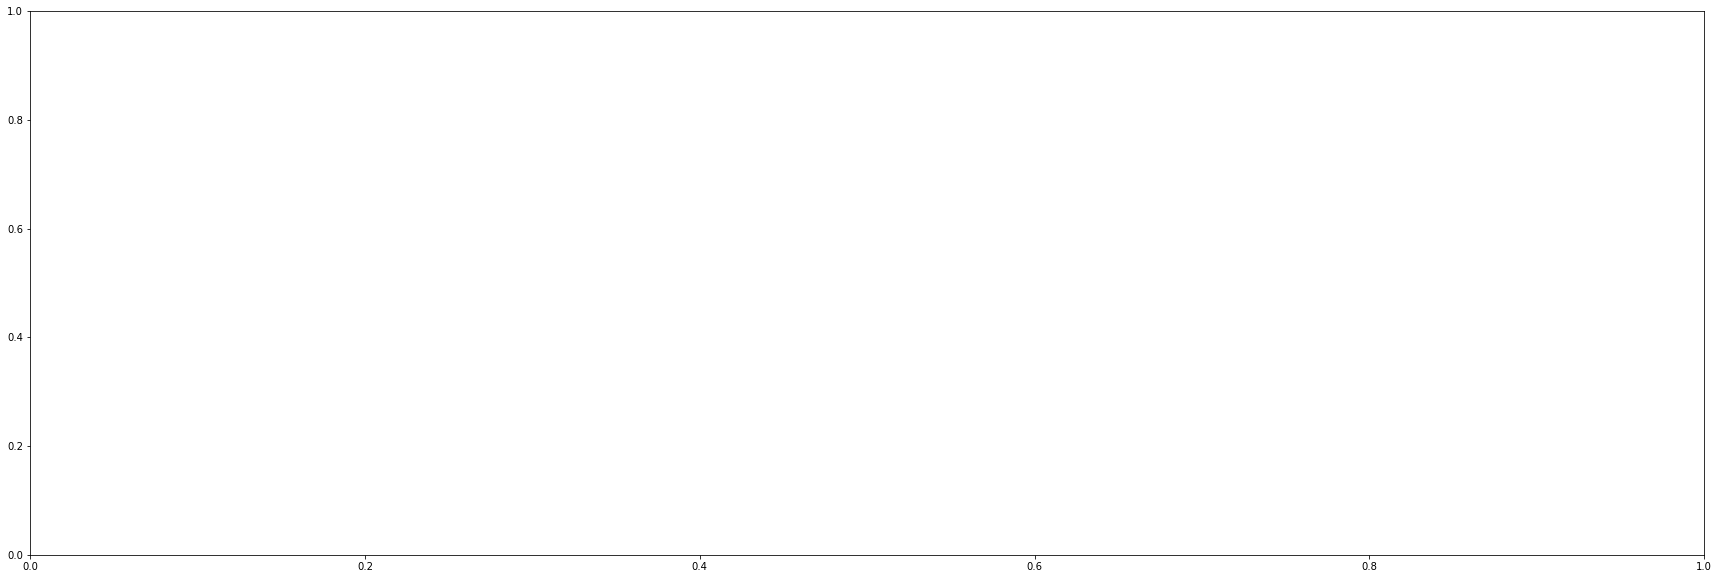

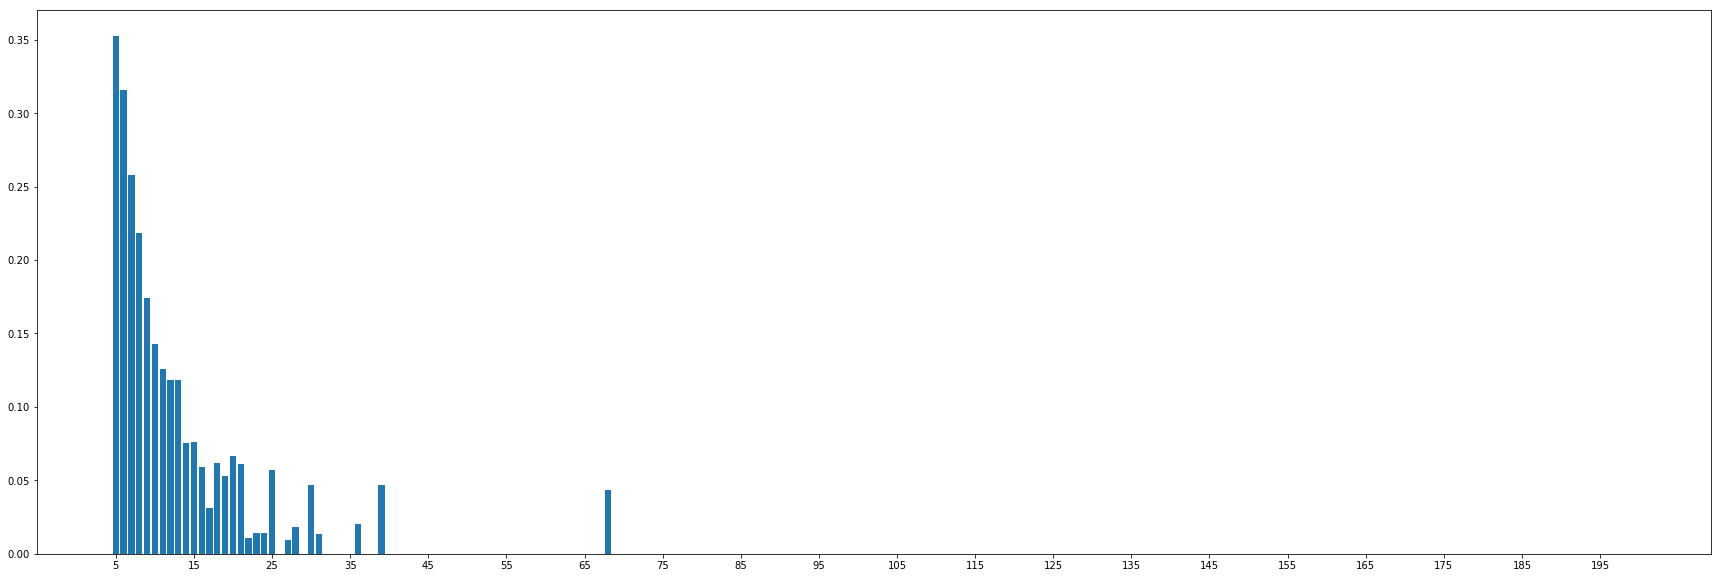

In [19]:
missed_clusters = {cluster:ref_clusters[cluster] for cluster in r}
missed_sizes = func_tools.clusters_size_dict(missed_clusters)
all_sizes = func_tools.clusters_size_dict(ref_clusters)
missed_freq = defaultdict(lambda : 0, Counter(missed_sizes.values()))
all_freq = defaultdict(lambda : 0, Counter(all_sizes.values()))

a = []
for i in range(5, 200):
    if all_freq[i]:
        a.append(1.0 * missed_freq[i] / all_freq[i])
    else:
        a.append(0)

plt.figure(figsize=(30, 10))
plt.bar(range(5,200), a)
plt.xticks(range(5, 200, 10), range(5, 200, 10))

plt.show()

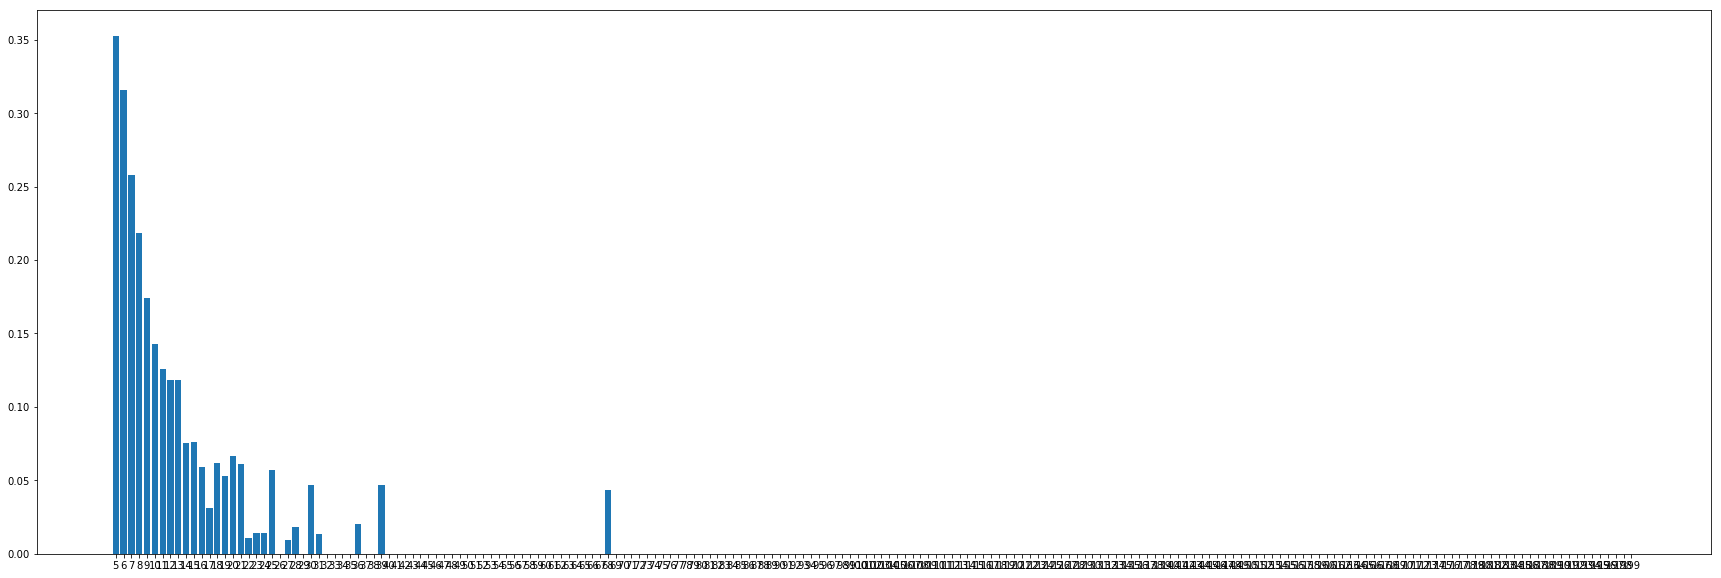

In [7]:
res_perc = []
for i in range(5, 200):
    clusters_with_i_size = map(str, df1[df1['size'] == i].index)
    unrecognized_with_i_size = [] 
    if len(clusters_with_i_size) != 0:
        for cluster_id in clusters_with_i_size:
            if cluster_id in r1 and len(clusters_with_i_size) != 0:
                unrecognized_with_i_size.append(cluster_id)
        res_perc.append(1.0 * len(unrecognized_with_i_size)/len(clusters_with_i_size))
    else:
        res_perc.append(0.0)
    
plt.figure(figsize=(30, 10))
plt.bar(range(5,200), res_perc)
plt.xticks(range(5,200), range(5,200))
plt.show()

In [11]:
input_reads = '/Bmo/orange_nikita/GMC_compilation/GMC_3_IG/input3.fa'
ref_rcm_file = '/Bmo/orange_nikita/GMC_compilation/GMC_3_IG/repertoire3.rcm'
cons_rcm_file = '/Bmo/orange_nikita/GMC_compilation/splitted/august22/GMC_3_splitted_5_thresh.rcm'
res1 = res_cons(input_reads, ref_rcm_file, cons_rcm_file)

In [12]:
r1 = set(res1[0])
ref_clusters1 = res1[1]
cons_clusters1 = res1[2]

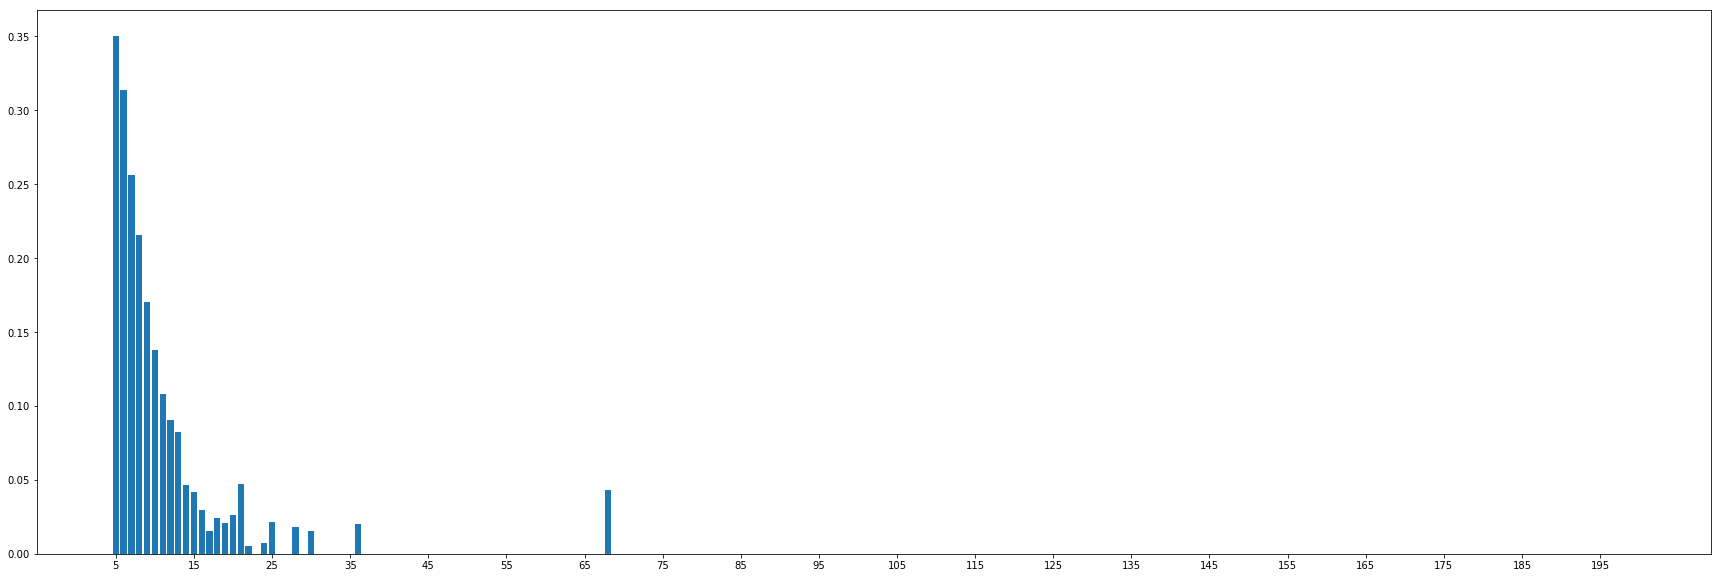

In [14]:
missed_clusters = {cluster:ref_clusters1[cluster] for cluster in r1}

missed_sizes = func_tools.clusters_size_dict(missed_clusters)

all_sizes = func_tools.clusters_size_dict(ref_clusters1)

missed_freq = defaultdict(lambda : 0, Counter(missed_sizes.values()))

all_freq = defaultdict(lambda : 0, Counter(all_sizes.values()))

b = []
for i in range(5, 200):
    if all_freq[i]:
        b.append(1.0 * missed_freq[i] / all_freq[i])
    else:
        b.append(0)

plt.figure(figsize=(30, 10))
plt.bar(range(5,200), b)
plt.xticks(range(5, 200, 10), range(5, 200, 10))

plt.show()

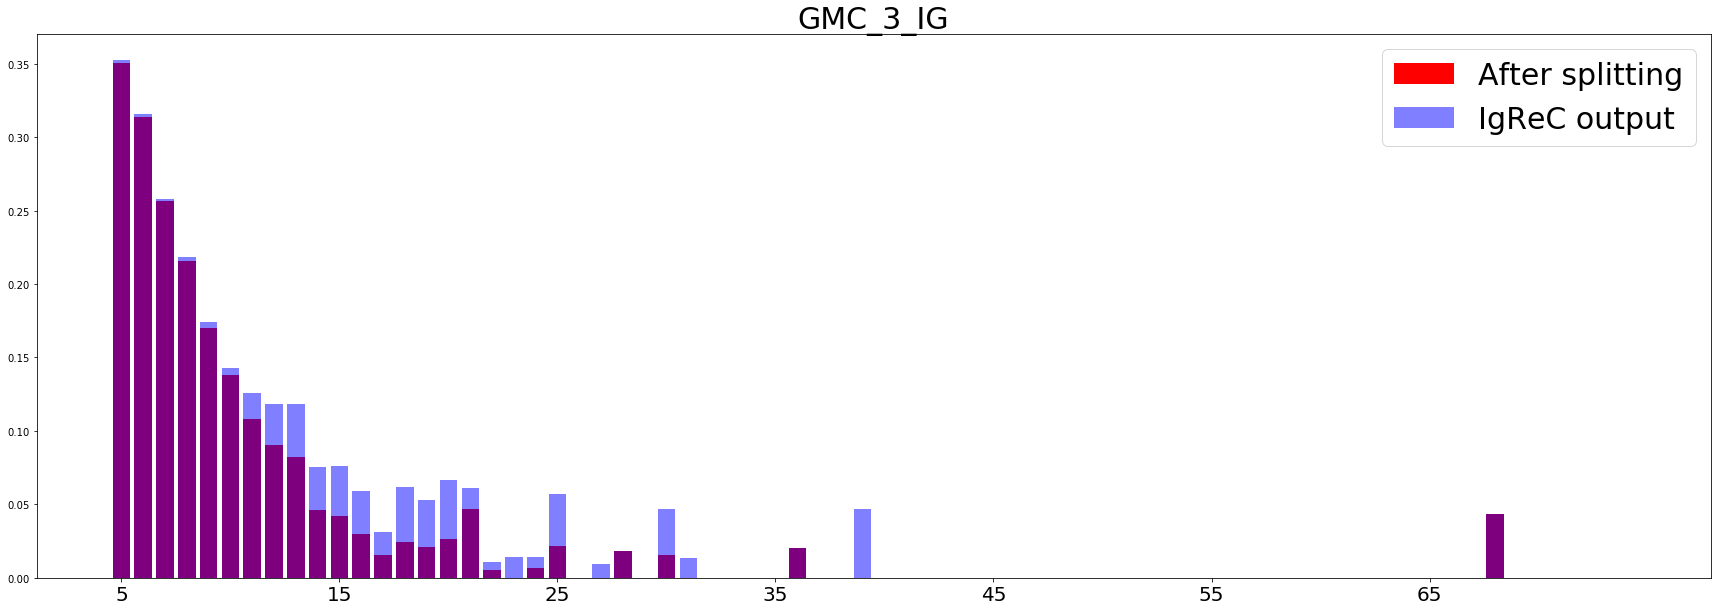

In [39]:
plt.figure(figsize=(30, 10))
plt.bar(range(5,75), b[:70], color='r', label='After splitting')
plt.bar(range(5,75), a[:70], alpha=0.5, color='b', label='IgReC output')
plt.xticks(range(5, 75, 10), range(5, 75, 10), fontsize=20)
plt.title('GMC_3_IG', fontsize=30)
plt.legend(prop={'size':30})

plt.show()

In [53]:
print 'before splitting: ', np.sum(a[:70])
print 'after splitting: ', np.sum(b[:70])

before splitting:  2.60189715595
after splitting:  2.10775213732


In [40]:
input_reads = '/Bmo/orange_nikita/GMC_compilation/GMC_3_IG/input3.fa'
ref_rcm_file = '/Bmo/orange_nikita/GMC_compilation/GMC_3_IG/repertoire3.rcm'
cons_rcm_file = '/Bmo/orange_nikita/GMC_compilation/splitted/august23/GMC_3_splitted_5_thresh.rcm'
res2 = res_cons(input_reads, ref_rcm_file, cons_rcm_file)

In [41]:
r2 = set(res2[0])
ref_clusters2 = res2[1]
cons_clusters2 = res2[2]

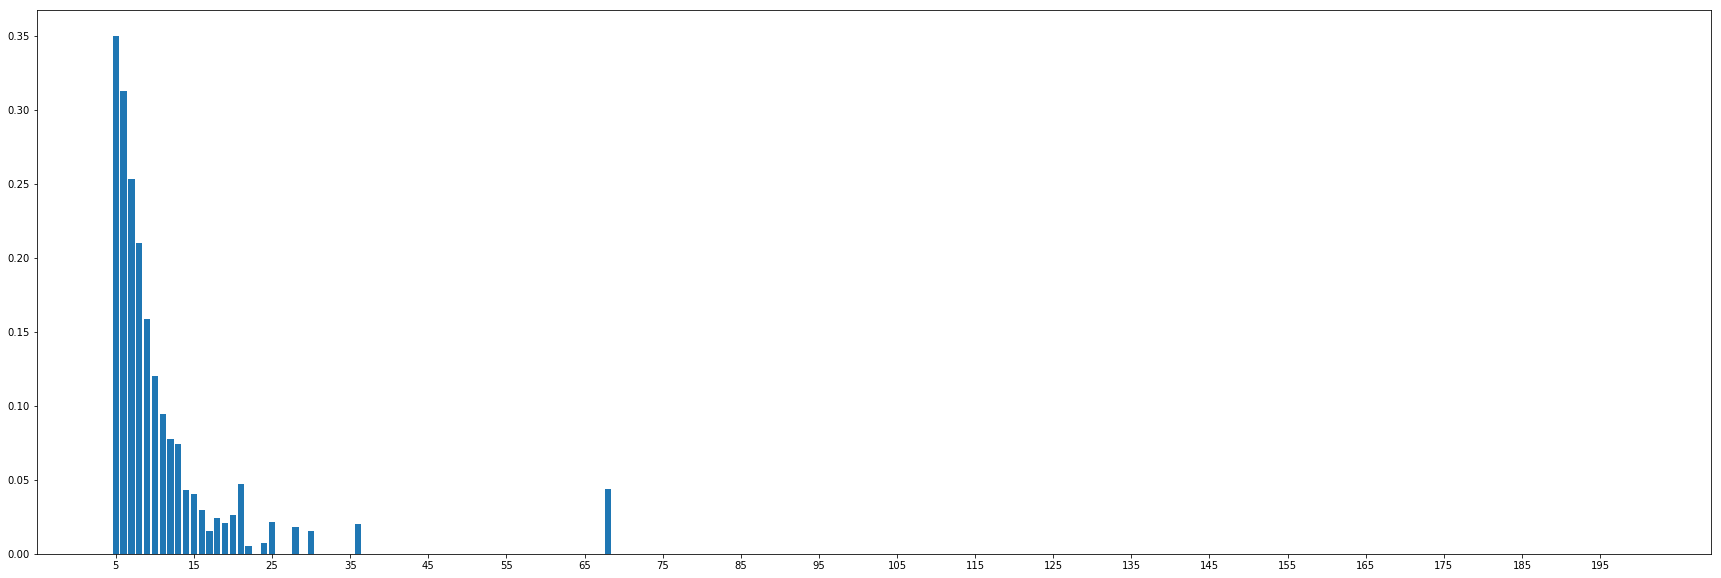

In [62]:
missed_clusters = {cluster:ref_clusters1[cluster] for cluster in r2}

missed_sizes = func_tools.clusters_size_dict(missed_clusters)

all_sizes = func_tools.clusters_size_dict(ref_clusters2)

missed_freq = defaultdict(lambda : 0, Counter(missed_sizes.values()))

all_freq = defaultdict(lambda : 0, Counter(all_sizes.values()))

c = []
for i in range(5, 200):
    if all_freq[i]:
        c.append(1.0 * missed_freq[i] / all_freq[i])
    else:
        c.append(0)

plt.figure(figsize=(30, 10))
plt.bar(range(5,200), c)
plt.xticks(range(5, 200, 10), range(5, 200, 10))

plt.show()

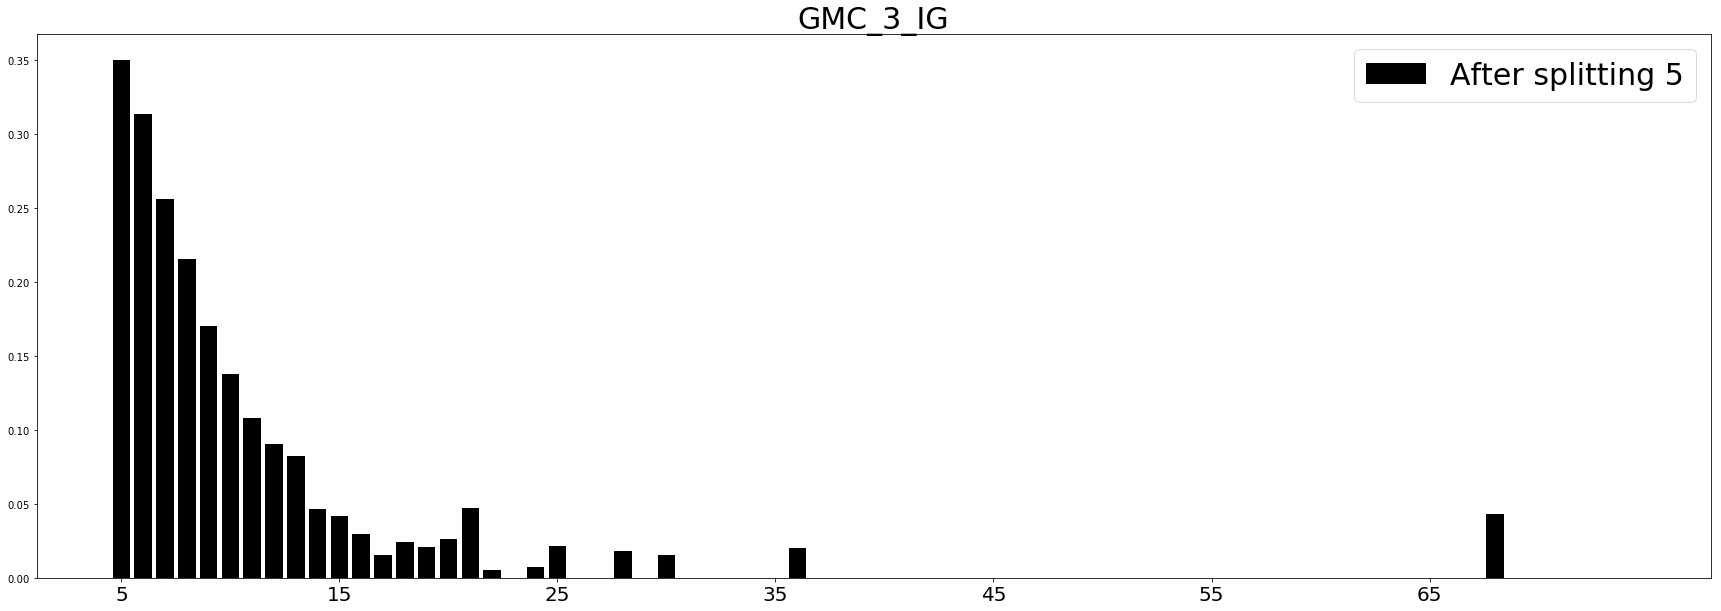

In [49]:
plt.figure(figsize=(30, 10))
plt.bar(range(5,75), b[:70], color='k', label='After splitting 5')
#plt.bar(range(5,75), b[:70], alpha=0.6, color='r', label='After splitting 10')
#plt.bar(range(5,75), a[:70], alpha=0.5, color='b', label='IgReC output')
plt.xticks(range(5, 75, 10), range(5, 75, 10), fontsize=20)
plt.title('GMC_3_IG', fontsize=30)
plt.legend(prop={'size':30})

plt.show()

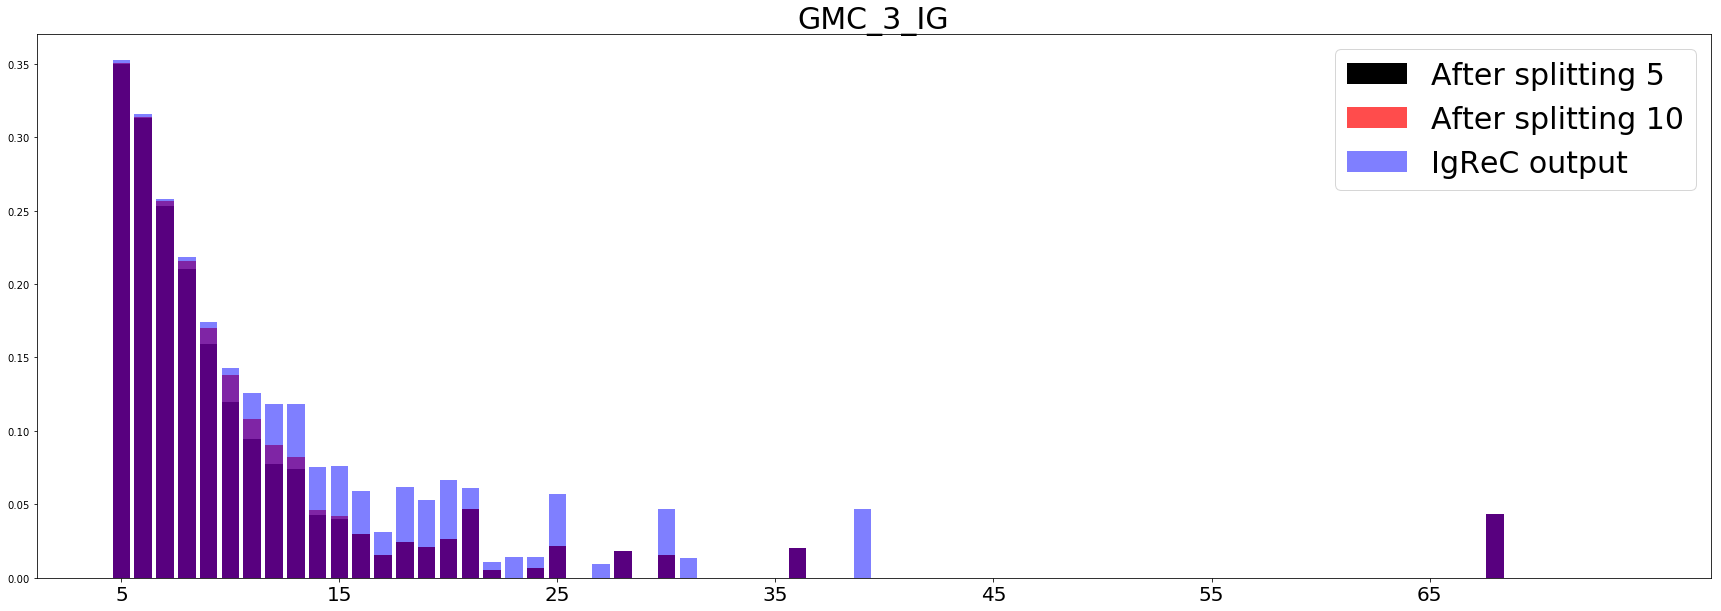

In [66]:
plt.figure(figsize=(30, 10))
plt.bar(range(5,75), c[:70], color='k', label='After splitting 5')
plt.bar(range(5,75), b[:70], alpha=0.7, color='r', label='After splitting 10')
plt.bar(range(5,75), a[:70], alpha=0.5, color='b', label='IgReC output')
plt.xticks(range(5, 75, 10), range(5, 75, 10), fontsize=20)
plt.title('GMC_3_IG', fontsize=30)
plt.legend(prop={'size':30})

plt.show()

In [55]:
input_reads = '/Bmo/orange_nikita/GMC_compilation/GMC_3_IG/input3.fa'
ref_rcm_file = '/Bmo/orange_nikita/GMC_compilation/GMC_3_IG/repertoire3.rcm'
cons_rcm_file = '/Bmo/orange_nikita/GMC_compilation/splitted/august23/GMC_3_splitted_5_thresh_1_model.rcm'
res4 = res_cons(input_reads, ref_rcm_file, cons_rcm_file)

In [56]:
r4 = set(res4[0])
ref_clusters4 = res4[1]
cons_clusters4 = res4[2]

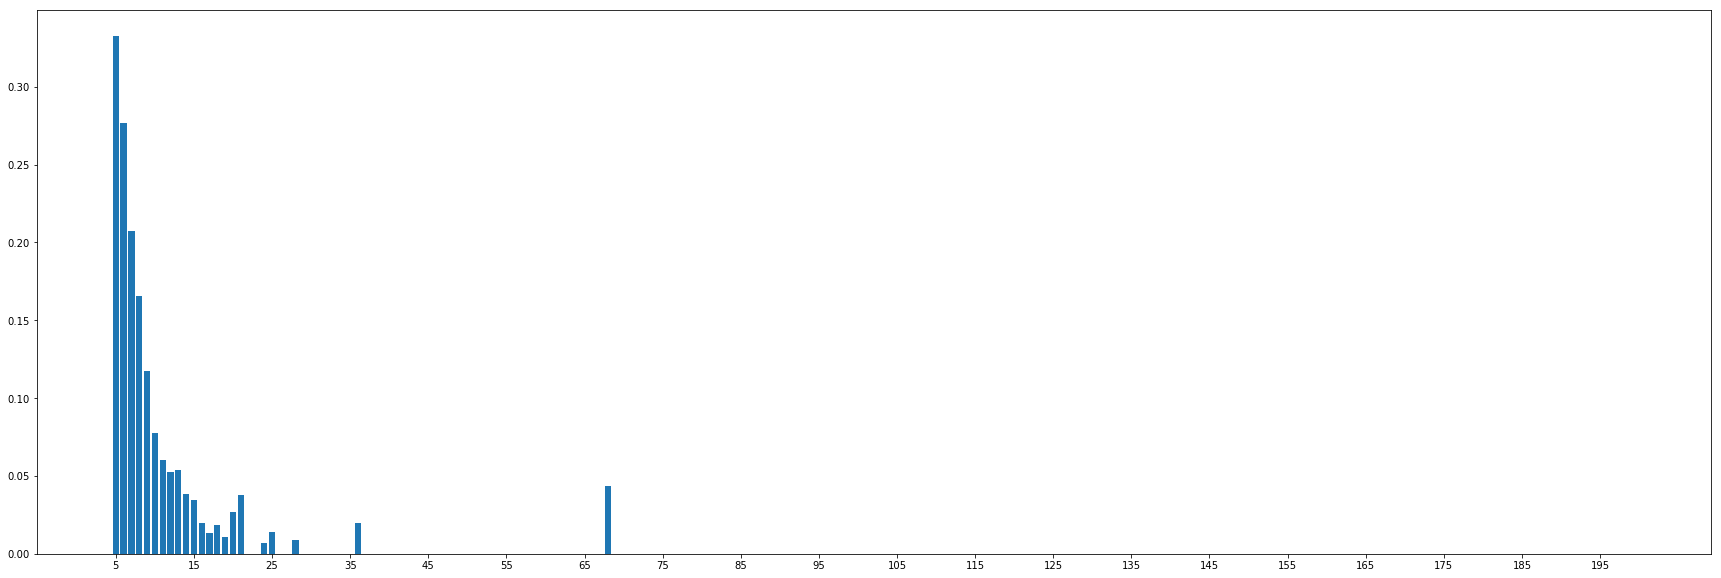

In [63]:
missed_clusters = {cluster:ref_clusters1[cluster] for cluster in r4}

missed_sizes = func_tools.clusters_size_dict(missed_clusters)

all_sizes = func_tools.clusters_size_dict(ref_clusters4)

missed_freq = defaultdict(lambda : 0, Counter(missed_sizes.values()))

all_freq = defaultdict(lambda : 0, Counter(all_sizes.values()))

d = []
for i in range(5, 200):
    if all_freq[i]:
        d.append(1.0 * missed_freq[i] / all_freq[i])
    else:
        d.append(0)

plt.figure(figsize=(30, 10))
plt.bar(range(5,200), d)
plt.xticks(range(5, 200, 10), range(5, 200, 10))

plt.show()

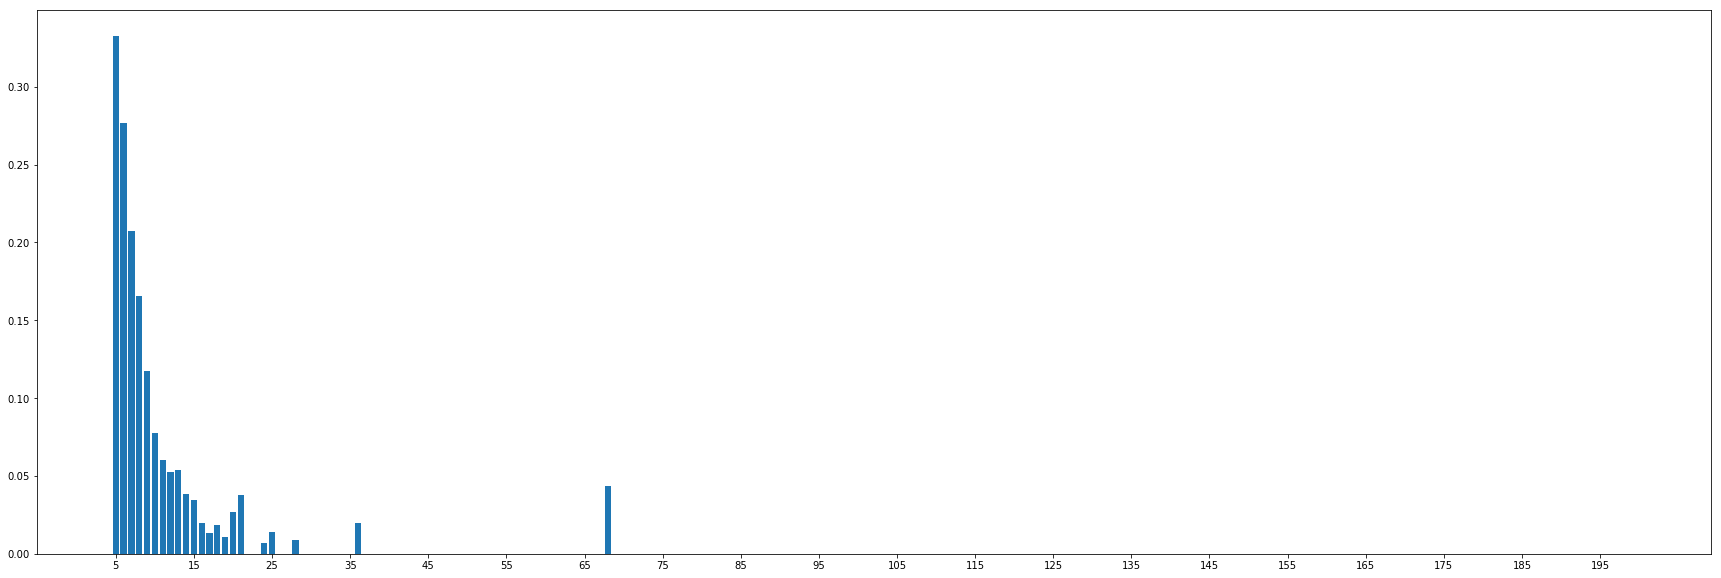

In [94]:
missed_clusters = {cluster:ref_clusters4[cluster] for cluster in r4}

missed_sizes = func_tools.clusters_size_dict(missed_clusters)

all_sizes = func_tools.clusters_size_dict(ref_clusters4)

missed_freq = defaultdict(lambda : 0, Counter(missed_sizes.values()))

all_freq = defaultdict(lambda : 0, Counter(all_sizes.values()))

d = []
for i in range(5, 200):
    if all_freq[i]:
        d.append(1.0 * missed_freq[i] / all_freq[i])
    else:
        d.append(0)
        
d1 = []
for i in range(5, 200):
    if all_freq[i]:
        d1.append(missed_freq[i])
    else:
        d1.append(0)

plt.figure(figsize=(30, 10))
plt.bar(range(5,200), d)
plt.xticks(range(5, 200, 10), range(5, 200, 10))

plt.show()

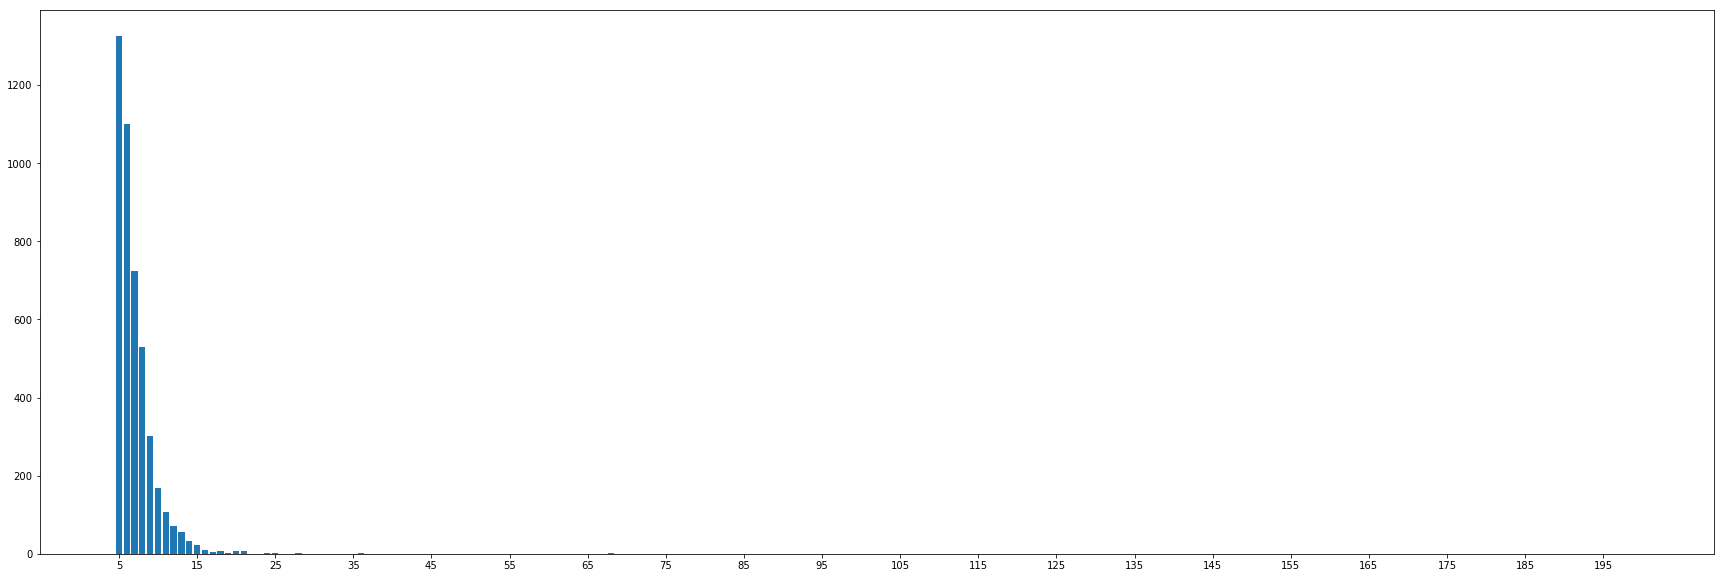

In [95]:
plt.figure(figsize=(30, 10))
plt.bar(range(5,200), d1)
plt.xticks(range(5, 200, 10), range(5, 200, 10))

plt.show()

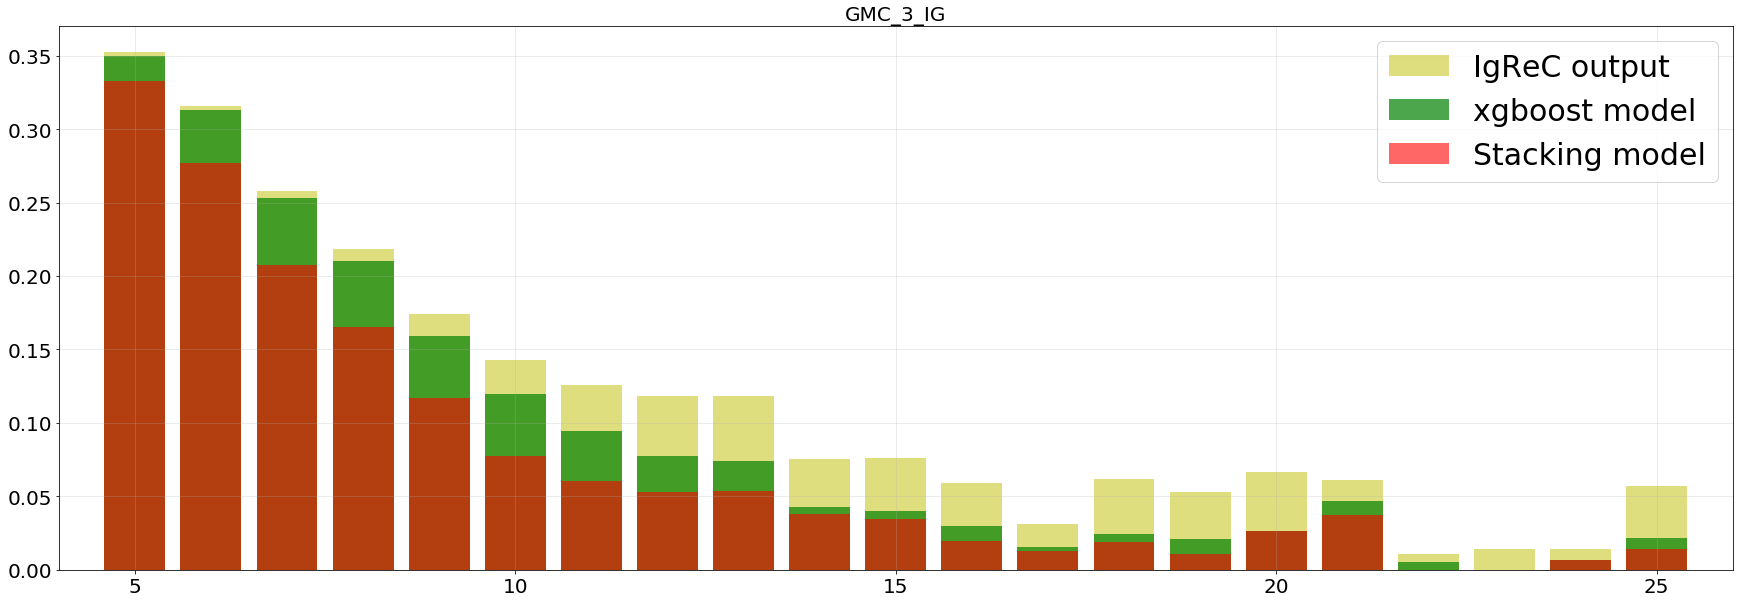

In [93]:
plt.figure(figsize=(30, 10))
plt.grid(alpha=0.3)
plt.bar(range(5,75), a[:70], alpha=0.5, color='y', label='IgReC output')
plt.bar(range(5,75), c[:70], alpha=0.7, color='g', label='xgboost model')
plt.bar(range(5,75), d[:70], alpha=0.6, color='r', label='Stacking model')
plt.xticks(range(5, 75, 5), range(5, 75, 5), fontsize=20)
plt.yticks(fontsize=20)
plt.xlim((4, 26))
plt.title('GMC_3_IG', fontsize=20)
plt.legend(prop={'size':30})

plt.show()

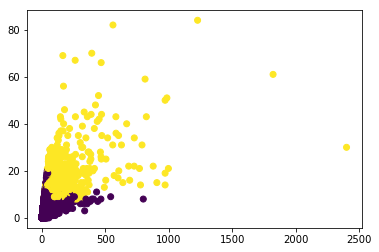

In [121]:
plt.scatter(data['size'], data['second_vote_abs1'], c=xgboost_pred)
plt.show()

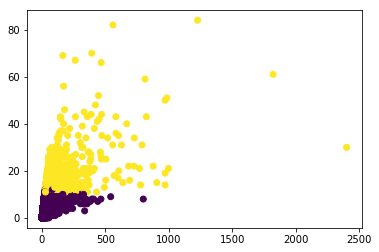

In [117]:
plt.scatter(data['size'], data['second_vote_abs1'], c=logreg_pred)
plt.show()

In [5]:
input_reads = '/Bmo/orange_nikita/AGE_compilation/AGE1/input3.fa'
ref_rcm_file = '/Bmo/orange_nikita/AGE_compilation/AGE1/repertoire3.rcm'
cons_rcm_file = '/Bmo/orange_nikita/AGE_compilation/AGE1/final_repertoire.rcm'
res5 = func_tools.res_cons(input_reads, ref_rcm_file, cons_rcm_file)

input_reads = '/Bmo/orange_nikita/AGE_compilation/AGE1/input3.fa'
ref_rcm_file = '/Bmo/orange_nikita/AGE_compilation/AGE1/repertoire3.rcm'
cons_rcm_file = '/Bmo/orange_nikita/AGE_compilation/splitted/AGE1_splitted.rcm'
res6 = func_tools.res_cons(input_reads, ref_rcm_file, cons_rcm_file)

r5 = set(res5[0])
ref_clusters5 = res5[1]
cons_clusters5 = res5[2]

missed_clusters = {cluster:ref_clusters5[cluster] for cluster in r5}

missed_sizes = func_tools.clusters_size_dict(missed_clusters)

all_sizes = func_tools.clusters_size_dict(ref_clusters5)

missed_freq = defaultdict(lambda : 0, Counter(missed_sizes.values()))

all_freq = defaultdict(lambda : 0, Counter(all_sizes.values()))

a = []
for i in range(5, 200):
    if all_freq[i]:
        a.append(1.0 * missed_freq[i] / all_freq[i])
    else:
        a.append(0)

r6 = set(res6[0])
ref_clusters6 = res6[1]
cons_clusters6 = res6[2]

missed_clusters = {cluster:ref_clusters6[cluster] for cluster in r6}

missed_sizes = func_tools.clusters_size_dict(missed_clusters)

all_sizes = func_tools.clusters_size_dict(ref_clusters6)

missed_freq = defaultdict(lambda : 0, Counter(missed_sizes.values()))

all_freq = defaultdict(lambda : 0, Counter(all_sizes.values()))

b = []
for i in range(5, 200):
    if all_freq[i]:
        b.append(1.0 * missed_freq[i] / all_freq[i])
    else:
        b.append(0)

plt.figure(figsize=(30, 10))
plt.grid(alpha=0.3)
plt.bar(range(5,75), a[5:75], alpha=0.5, color='y', label='IgReC output')
plt.bar(range(5,75), b[5:75], alpha=0.6, color='r', label='Stacking model')
plt.xticks(range(5, 75, 5), range(5, 75, 5), fontsize=20)
plt.yticks(fontsize=20)
plt.xlim((4, 26))
plt.title('GMC_3_IG', fontsize=20)
plt.legend(prop={'size':30})

plt.show()

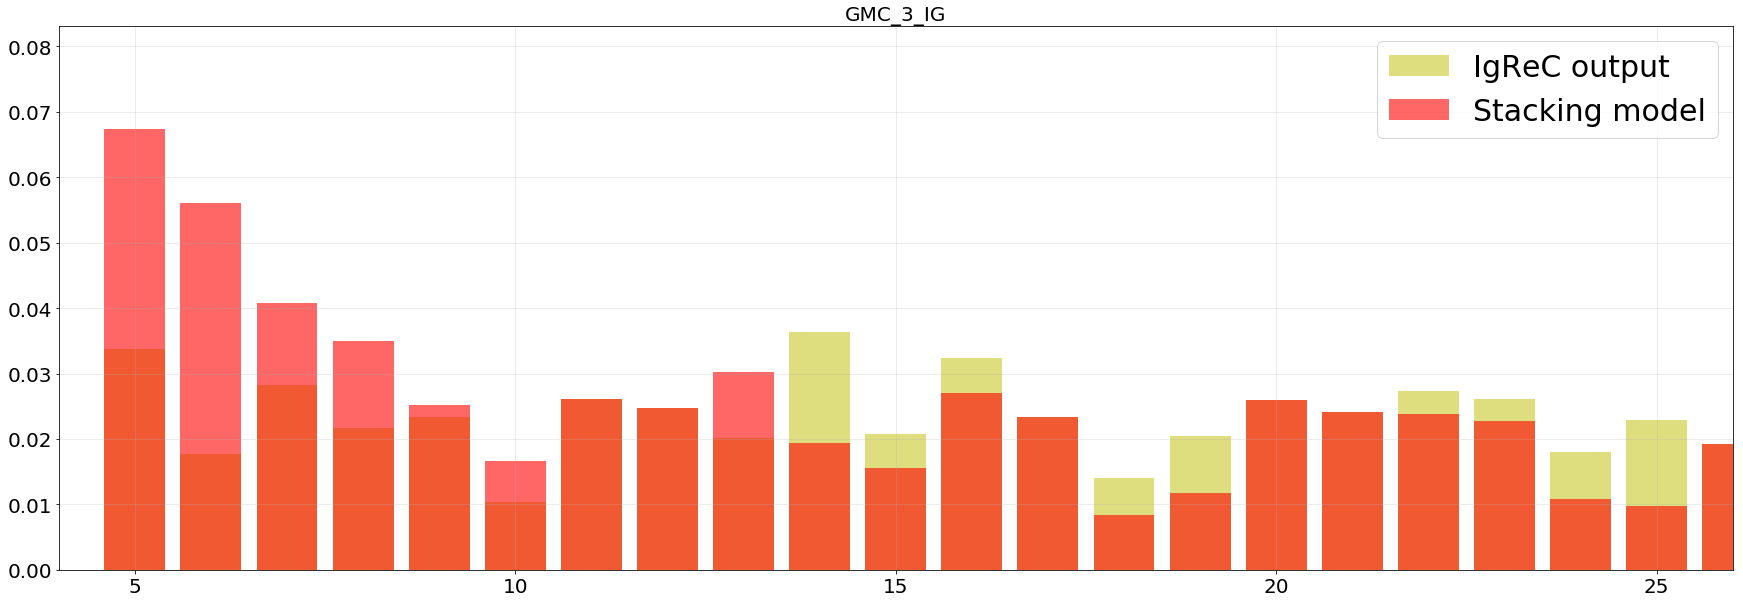

In [11]:
input_reads = '/Bmo/orange_nikita/AGE_compilation/AGE2/input3.fa'
ref_rcm_file = '/Bmo/orange_nikita/AGE_compilation/AGE2/repertoire3.rcm'
cons_rcm_file = '/Bmo/orange_nikita/AGE_compilation/AGE2/final_repertoire.rcm'
res5 = res_cons(input_reads, ref_rcm_file, cons_rcm_file)

input_reads = '/Bmo/orange_nikita/AGE_compilation/AGE2/input3.fa'
ref_rcm_file = '/Bmo/orange_nikita/AGE_compilation/AGE2/repertoire3.rcm'
cons_rcm_file = '/Bmo/orange_nikita/AGE_compilation/splitted/AGE2_splitted.rcm'
res6 = res_cons(input_reads, ref_rcm_file, cons_rcm_file)

r5 = set(res5[0])
ref_clusters5 = res5[1]
cons_clusters5 = res5[2]

missed_clusters = {cluster:ref_clusters5[cluster] for cluster in r5}

missed_sizes = func_tools.clusters_size_dict(missed_clusters)

all_sizes = func_tools.clusters_size_dict(ref_clusters5)

missed_freq = defaultdict(lambda : 0, Counter(missed_sizes.values()))

all_freq = defaultdict(lambda : 0, Counter(all_sizes.values()))

c = []
for i in range(5, 200):
    if all_freq[i]:
        c.append(1.0 * missed_freq[i] / all_freq[i])
    else:
        c.append(0)

r6 = set(res6[0])
ref_clusters6 = res6[1]
cons_clusters6 = res6[2]

missed_clusters = {cluster:ref_clusters6[cluster] for cluster in r6}

missed_sizes = func_tools.clusters_size_dict(missed_clusters)

all_sizes = func_tools.clusters_size_dict(ref_clusters6)

missed_freq = defaultdict(lambda : 0, Counter(missed_sizes.values()))

all_freq = defaultdict(lambda : 0, Counter(all_sizes.values()))

d = []
for i in range(5, 200):
    if all_freq[i]:
        d.append(1.0 * missed_freq[i] / all_freq[i])
    else:
        d.append(0)

plt.figure(figsize=(30, 10))
plt.grid(alpha=0.3)
plt.bar(range(5,75), c[5:75], alpha=0.5, color='y', label='IgReC output')
plt.bar(range(5,75), d[5:75], alpha=0.6, color='r', label='Stacking model')
plt.xticks(range(5, 75, 5), range(5, 75, 5), fontsize=20)
plt.yticks(fontsize=20)
plt.xlim((4, 26))
plt.title('GMC_3_IG', fontsize=20)
plt.legend(prop={'size':30})

plt.show()

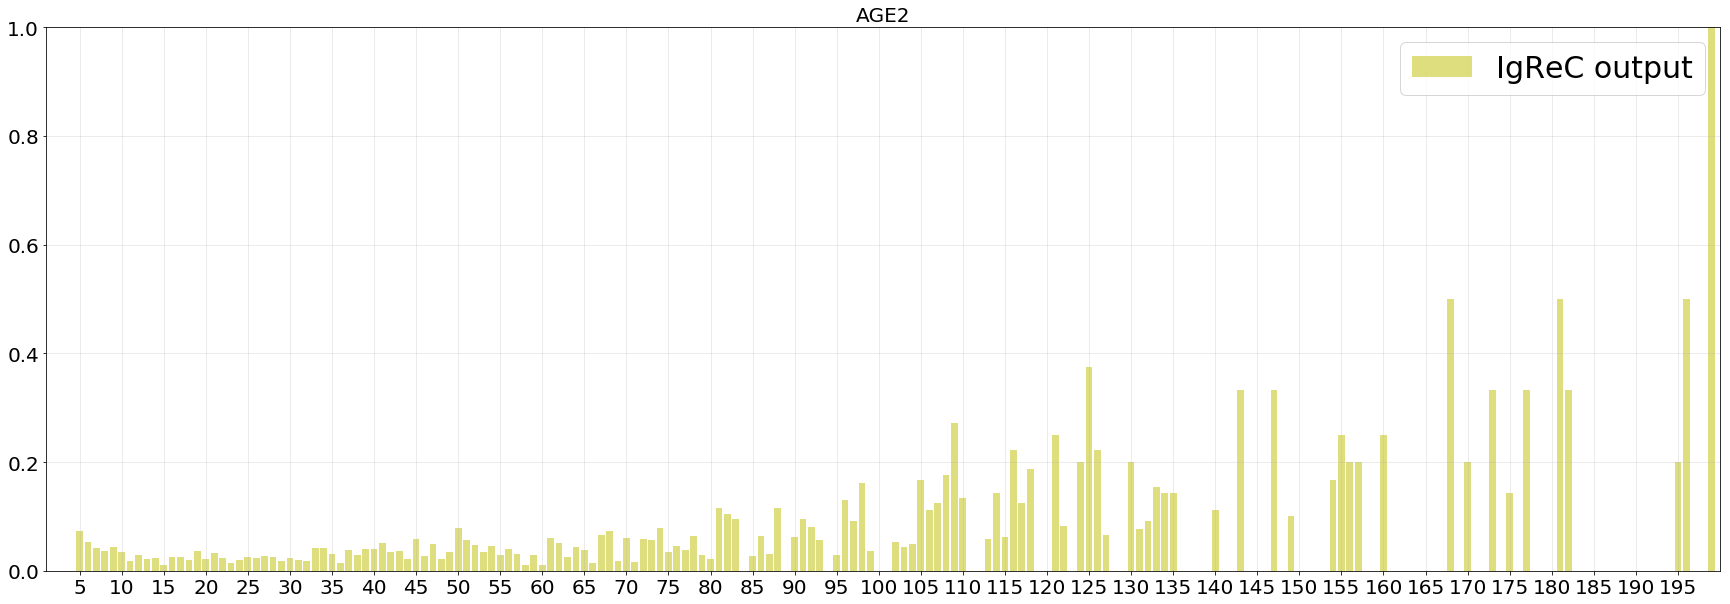

In [28]:
plt.figure(figsize=(30, 10))
plt.grid(alpha=0.3)
plt.bar(range(5,200), c[:195], alpha=0.5, color='y', label='IgReC output')
#plt.bar(range(5,200), d[:195], alpha=0.6, color='r', label='Stacking model')
plt.xticks(range(5, 200, 5), range(5, 200, 5), fontsize=20)
plt.yticks(fontsize=20)
plt.xlim((1, 200))
plt.ylim((0, 1))
plt.title('AGE2', fontsize=20)
plt.legend(prop={'size':30})

plt.show()

In [19]:
input_reads = '/Bmo/orange_nikita/FLU_compilation/FLU_FV_21_IG/input3.fa'
ref_rcm_file = '/Bmo/orange_nikita/FLU_compilation/FLU_FV_21_IG/repertoire3.rcm'
cons_rcm_file = '/Bmo/orange_nikita/FLU_compilation/FLU_FV_21_IG/final_repertoire.rcm'
res7 = res_cons(input_reads, ref_rcm_file, cons_rcm_file)

input_reads = '/Bmo/orange_nikita/FLU_compilation/FLU_FV_21_IG/input3.fa'
ref_rcm_file = '/Bmo/orange_nikita/FLU_compilation/FLU_FV_21_IG/repertoire3.rcm'
cons_rcm_file = '/Bmo/orange_nikita/FLU_compilation/splitted/FLU_FV_21_IG_splitted.rcm'
res8 = res_cons(input_reads, ref_rcm_file, cons_rcm_file)

r7 = set(res7[0])
ref_clusters7 = res7[1]
cons_clusters7 = res7[2]

missed_clusters = {cluster:ref_clusters7[cluster] for cluster in r7}

missed_sizes = func_tools.clusters_size_dict(missed_clusters)

all_sizes = func_tools.clusters_size_dict(ref_clusters7)

missed_freq = defaultdict(lambda : 0, Counter(missed_sizes.values()))

all_freq = defaultdict(lambda : 0, Counter(all_sizes.values()))

e = []
for i in range(5, 200):
    if all_freq[i]:
        e.append(1.0 * missed_freq[i] / all_freq[i])
    else:
        e.append(0)

r8 = set(res8[0])
ref_clusters8 = res8[1]
cons_clusters8 = res8[2]

missed_clusters = {cluster:ref_clusters8[cluster] for cluster in r8}

missed_sizes = func_tools.clusters_size_dict(missed_clusters)

all_sizes = func_tools.clusters_size_dict(ref_clusters8)

missed_freq = defaultdict(lambda : 0, Counter(missed_sizes.values()))

all_freq = defaultdict(lambda : 0, Counter(all_sizes.values()))

f = []
for i in range(5, 200):
    if all_freq[i]:
        f.append(1.0 * missed_freq[i] / all_freq[i])
    else:
        f.append(0)

plt.figure(figsize=(30, 10))
plt.grid(alpha=0.3)
plt.bar(range(5,200), f[:195], alpha=0.6, color='r', label='Stacking model')
plt.bar(range(5,200), e[:195], alpha=0.5, color='y', label='IgReC output')
plt.xticks(range(5, 200, 5), range(5, 200, 5), fontsize=20)
plt.yticks(fontsize=20)
plt.xlim((1, 200))
plt.ylim((0, 1))
plt.title('FLU 21 IG', fontsize=20)
plt.legend(prop={'size':30})

plt.show()

TypeError: seq argument should be a Seq object or similar

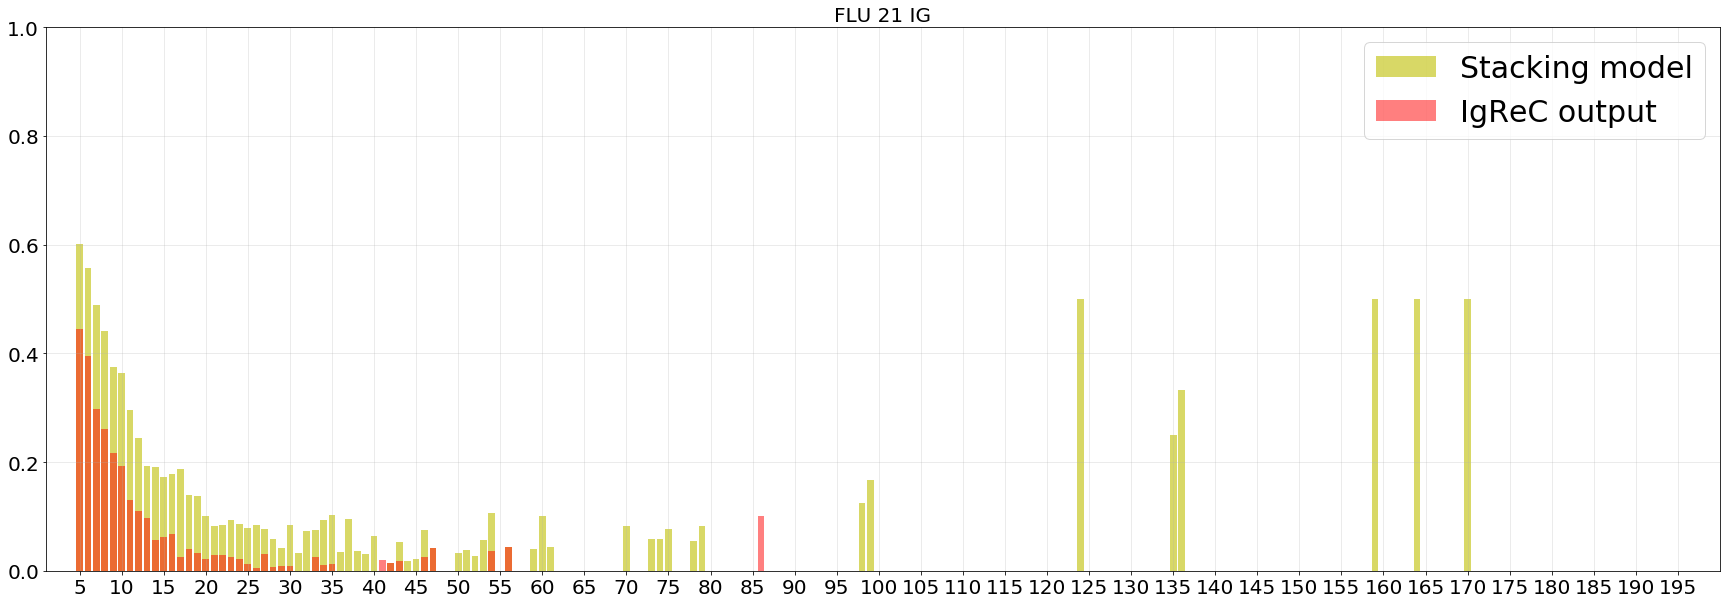

In [29]:
plt.figure(figsize=(30, 10))
plt.grid(alpha=0.3)
plt.bar(range(5,200), f[:195], alpha=0.6, color='y', label='Stacking model')
plt.bar(range(5,200), e[:195], alpha=0.5, color='r', label='IgReC output')
plt.xticks(range(5, 200, 5), range(5, 200, 5), fontsize=20)
plt.yticks(fontsize=20)
plt.xlim((1, 200))
plt.ylim((0, 1))
plt.title('FLU 21 IG', fontsize=20)
plt.legend(prop={'size':30})

plt.show()

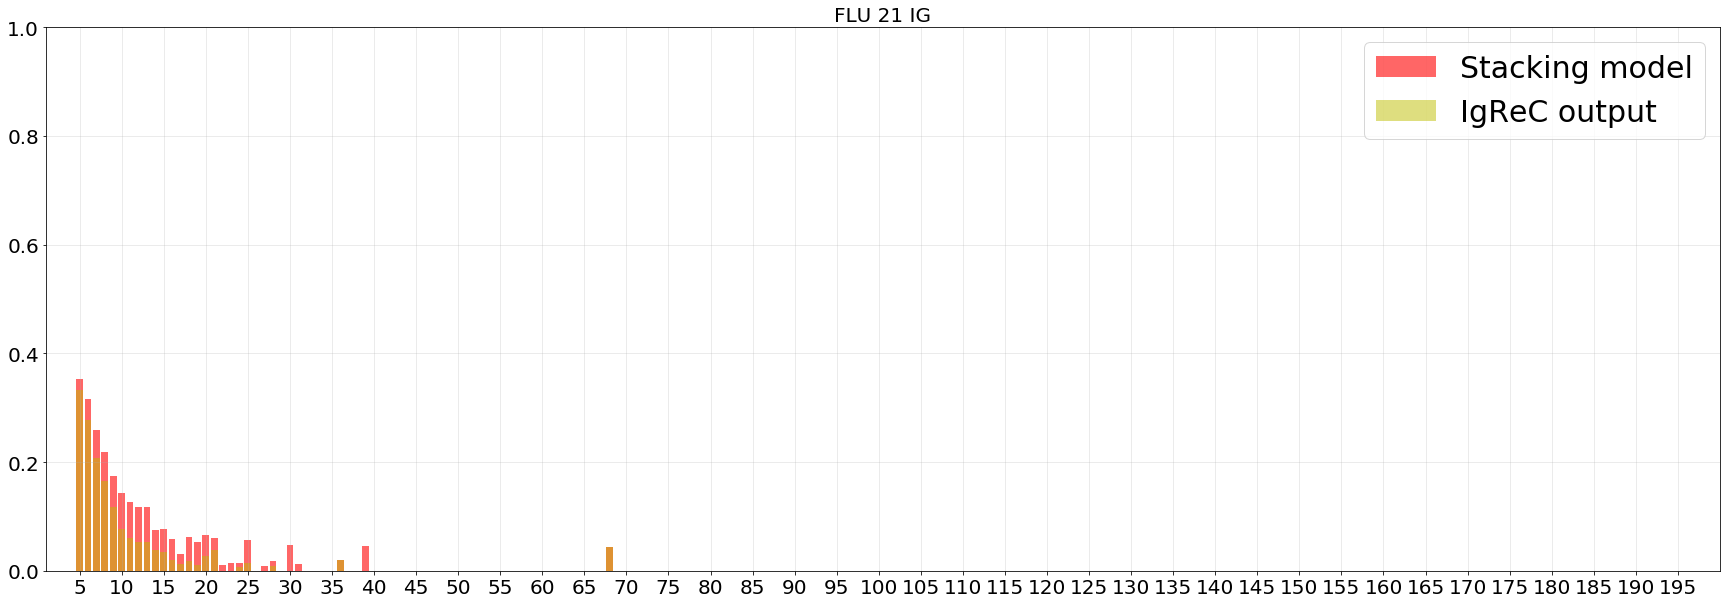

In [23]:
input_reads = '/Bmo/orange_nikita/GMC_compilation/GMC_3_IG/input3.fa'
ref_rcm_file = '/Bmo/orange_nikita/GMC_compilation/GMC_3_IG/repertoire3.rcm'
cons_rcm_file = '/Bmo/orange_nikita/GMC_compilation/GMC_3_IG/final_repertoire.rcm'
res9 = res_cons(input_reads, ref_rcm_file, cons_rcm_file)

input_reads = '/Bmo/orange_nikita/GMC_compilation/GMC_3_IG/input3.fa'
ref_rcm_file = '/Bmo/orange_nikita/GMC_compilation/GMC_3_IG/repertoire3.rcm'
cons_rcm_file = '/Bmo/orange_nikita/GMC_compilation/splitted/august23/GMC_3_splitted_5_thresh_1_model.rcm'
res10 = res_cons(input_reads, ref_rcm_file, cons_rcm_file)

r9 = set(res9[0])
ref_clusters9 = res9[1]
cons_clusters9 = res9[2]

missed_clusters = {cluster:ref_clusters9[cluster] for cluster in r9}

missed_sizes = func_tools.clusters_size_dict(missed_clusters)

all_sizes = func_tools.clusters_size_dict(ref_clusters9)

missed_freq = defaultdict(lambda : 0, Counter(missed_sizes.values()))

all_freq = defaultdict(lambda : 0, Counter(all_sizes.values()))

j = []
for i in range(5, 200):
    if all_freq[i]:
        j.append(1.0 * missed_freq[i] / all_freq[i])
    else:
        j.append(0)

r10 = set(res10[0])
ref_clusters10 = res10[1]
cons_clusters10 = res10[2]

missed_clusters = {cluster:ref_clusters10[cluster] for cluster in r10}

missed_sizes = func_tools.clusters_size_dict(missed_clusters)

all_sizes = func_tools.clusters_size_dict(ref_clusters10)

missed_freq = defaultdict(lambda : 0, Counter(missed_sizes.values()))

all_freq = defaultdict(lambda : 0, Counter(all_sizes.values()))

k = []
for i in range(5, 200):
    if all_freq[i]:
        k.append(1.0 * missed_freq[i] / all_freq[i])
    else:
        k.append(0)

plt.figure(figsize=(30, 10))
plt.grid(alpha=0.3)
plt.bar(range(5,200), j[:195], alpha=0.6, color='r', label='Stacking model')
plt.bar(range(5,200), k[:195], alpha=0.5, color='y', label='IgReC output')
plt.xticks(range(5, 200, 5), range(5, 200, 5), fontsize=20)
plt.yticks(fontsize=20)
plt.xlim((1, 200))
plt.ylim((0, 1))
plt.title('FLU 21 IG', fontsize=20)
plt.legend(prop={'size':30})

plt.show()

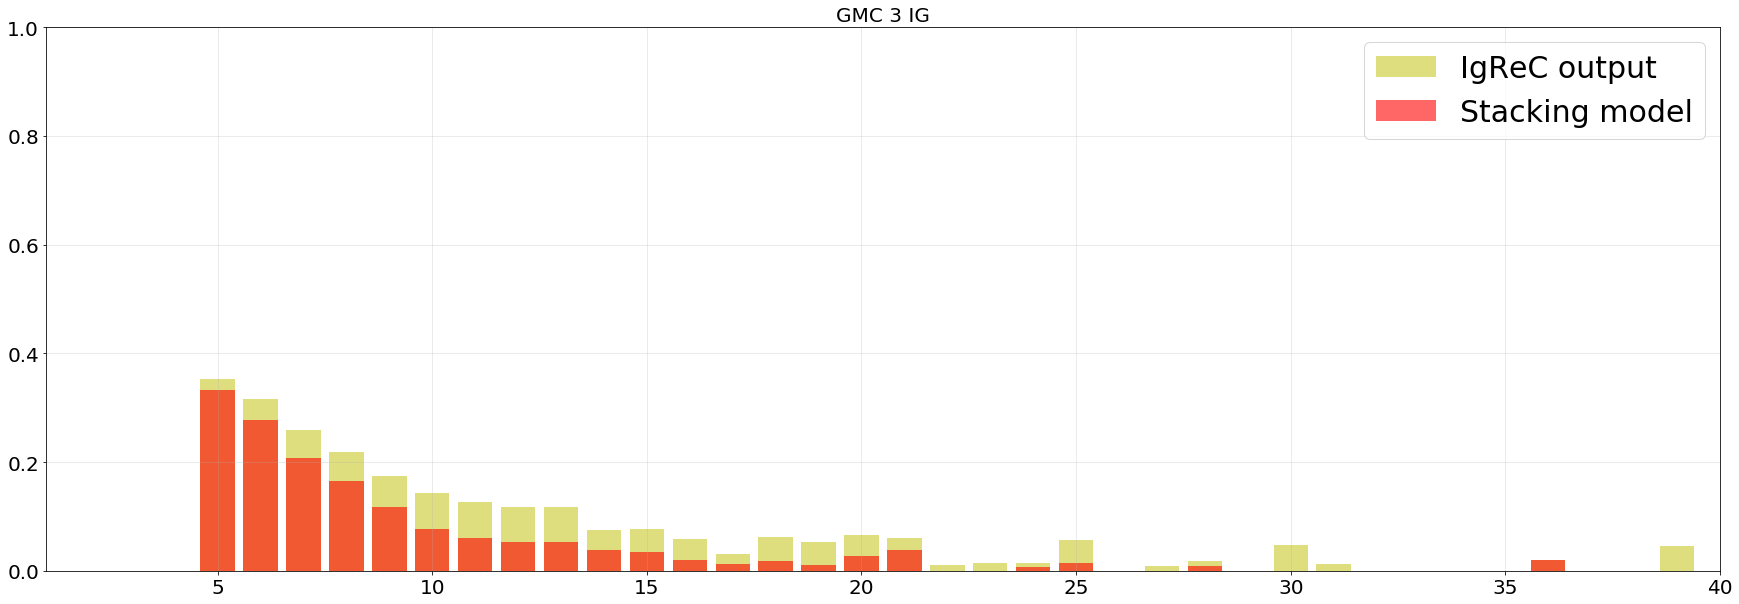

In [27]:
plt.figure(figsize=(30, 10))
plt.grid(alpha=0.3)
plt.bar(range(5,200), j[:195], alpha=0.5, color='y', label='IgReC output')
plt.bar(range(5,200), k[:195], alpha=0.6, color='r', label='Stacking model')
plt.xticks(range(5, 200, 5), range(5, 200, 5), fontsize=20)
plt.yticks(fontsize=20)
plt.xlim((1, 40))
plt.ylim((0, 1))
plt.title('GMC 3 IG', fontsize=20)
plt.legend(prop={'size':30})

plt.show()

In [30]:
perc_dict_general = {}

In [33]:
input_reads = '/Bmo/orange_nikita/FLU_compilation/FLU_FV_21_IG/input3.fa'
ref_rcm_file = '/Bmo/orange_nikita/FLU_compilation/FLU_FV_21_IG/repertoire3.rcm'
cons_rcm_file = '/Bmo/orange_nikita/FLU_compilation/FLU_FV_21_IG/final_repertoire.rcm'
res = res_cons(input_reads, ref_rcm_file, cons_rcm_file)

input_reads = '/Bmo/orange_nikita/FLU_compilation/FLU_FV_21_IG/input3.fa'
ref_rcm_file = '/Bmo/orange_nikita/FLU_compilation/FLU_FV_21_IG/repertoire3.rcm'
cons_rcm_file = '/Bmo/orange_nikita/general/august24/FLU_FV_21_IG_splitted_5_thesh_1_model.rcm'

res1 = res_cons(input_reads, ref_rcm_file, cons_rcm_file)

r = set(res[0])
ref_clusters = res[1]
cons_clusters = res[2]

missed_clusters = {cluster:ref_clusters[cluster] for cluster in r}

missed_sizes = func_tools.clusters_size_dict(missed_clusters)

all_sizes = func_tools.clusters_size_dict(ref_clusters)

missed_freq = defaultdict(lambda : 0, Counter(missed_sizes.values()))

all_freq = defaultdict(lambda : 0, Counter(all_sizes.values()))

a = []
for i in range(5, 200):
    if all_freq[i]:
        a.append(1.0 * missed_freq[i] / all_freq[i])
    else:
        a.append(0)

r1 = set(res1[0])
ref_clusters1 = res1[1]
cons_clusters1 = res1[2]

missed_clusters = {cluster:ref_clusters1[cluster] for cluster in r1}

missed_sizes = func_tools.clusters_size_dict(missed_clusters)

all_sizes = func_tools.clusters_size_dict(ref_clusters1)

missed_freq = defaultdict(lambda : 0, Counter(missed_sizes.values()))

all_freq = defaultdict(lambda : 0, Counter(all_sizes.values()))

b = []
for i in range(5, 200):
    if all_freq[i]:
        b.append(1.0 * missed_freq[i] / all_freq[i])
    else:
        b.append(0)

In [34]:
perc_dict_general['FLU_FV_21_IG'] = [a, b]

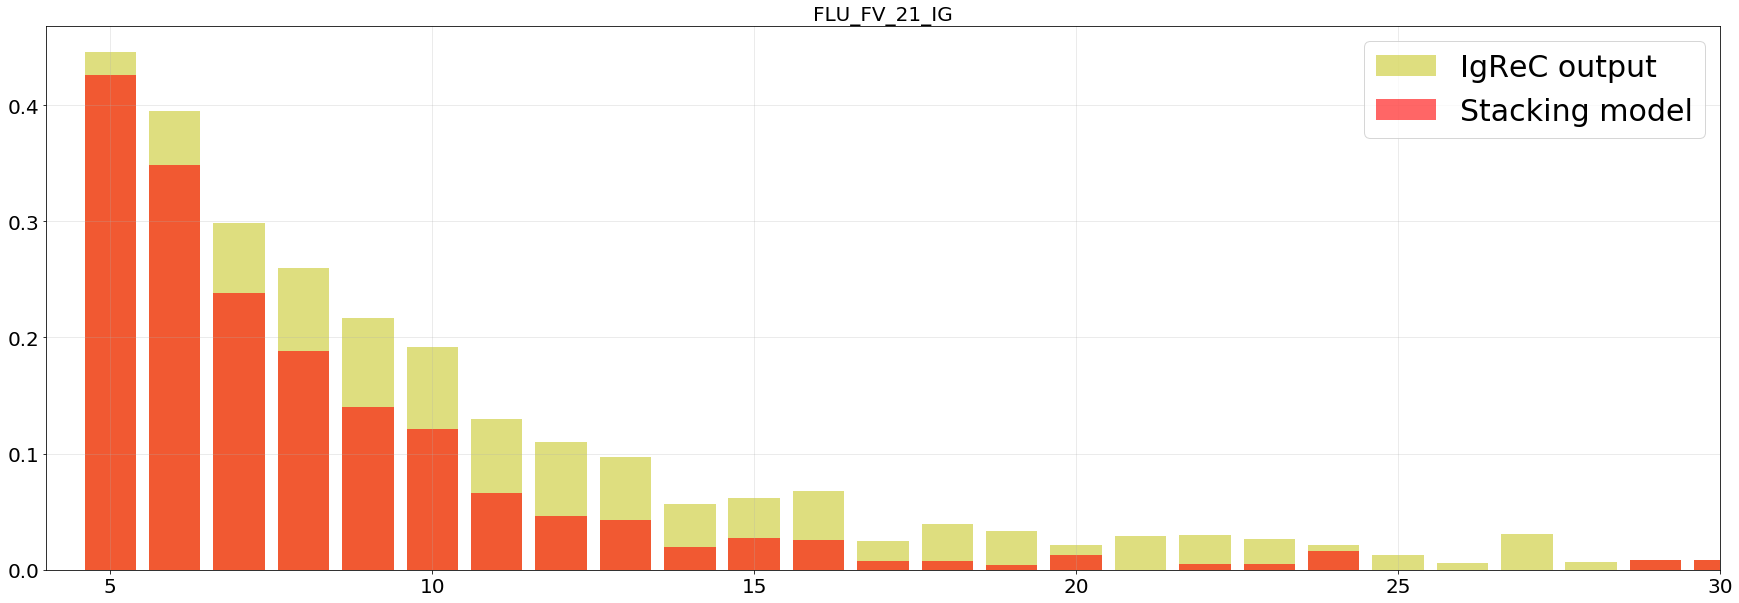

In [61]:
a, b = perc_dict_general['FLU_FV_21_IG']
plt.figure(figsize=(30, 10))
plt.grid(alpha=0.3)
plt.bar(range(5,200), a[:195], alpha=0.5, color='y', label='IgReC output')
plt.bar(range(5,200), b[:195], alpha=0.6, color='r', label='Stacking model')
plt.xticks(range(5, 200, 5), range(5, 200, 5), fontsize=20)
plt.yticks(fontsize=20)
plt.xlim((4, 30))

plt.title('FLU_FV_21_IG', fontsize=20)
plt.legend(prop={'size':30})

plt.show()

In [ ]:
input_reads = '/Bmo/orange_nikita/AGE_compilation/AGE2/input3.fa'
ref_rcm_file = '/Bmo/orange_nikita/AGE_compilation/AGE2/repertoire3.rcm'
cons_rcm_file = '/Bmo/orange_nikita/AGE_compilation/AGE2/final_repertoire.rcm'

In [49]:
input_reads = '/Bmo/orange_nikita/AGE_compilation/AGE4/input3.fa'
ref_rcm_file = '/Bmo/orange_nikita/AGE_compilation/AGE4/repertoire3.rcm'
cons_rcm_file_igrec = '/Bmo/orange_nikita/AGE_compilation/AGE4/final_repertoire.rcm'
cons_rcm_file_splitted = '/Bmo/orange_nikita/general/august24/AGE4_splitted_5_thesh_1_model.rcm'
a, b = calc_paired_sizes_hist(input_reads, ref_rcm_file, cons_rcm_file_igrec, cons_rcm_file_splitted)

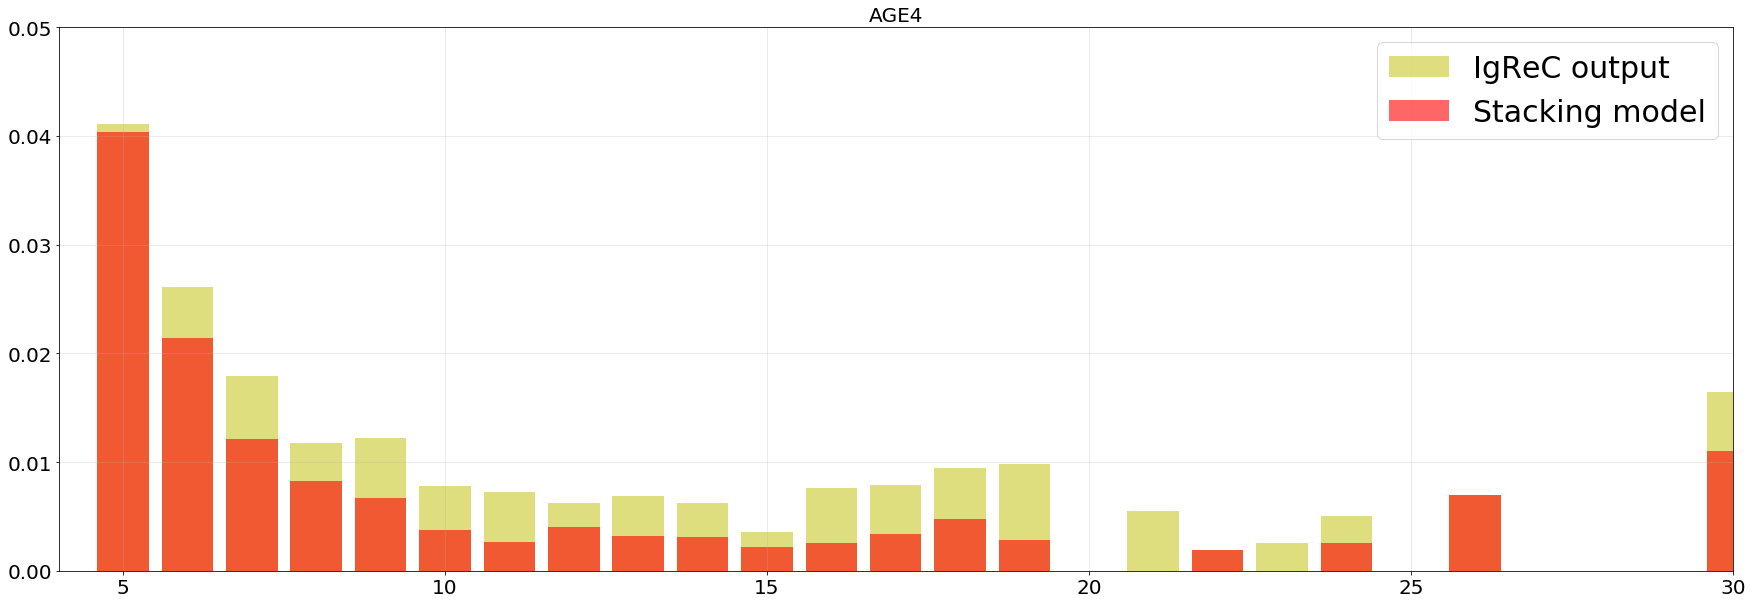

In [60]:
plt.figure(figsize=(30, 10))
plt.grid(alpha=0.3)
plt.bar(range(5,200), a[:195], alpha=0.5, color='y', label='IgReC output')
plt.bar(range(5,200), b[:195], alpha=0.6, color='r', label='Stacking model')
plt.xticks(range(5, 200, 5), range(5, 200, 5), fontsize=20)
plt.yticks(fontsize=20)
plt.xlim((4, 30))
plt.ylim((0, 0.05))
plt.title('AGE4', fontsize=20)
plt.legend(prop={'size':30})

plt.show()